<a href="https://colab.research.google.com/github/jevabrir/Prediccion_Ingreso_RegMult_OAPAS_Mex_Inegi/blob/main/Predicci%C3%B3n_RegMult_Ingreso_OAPAS_Mex_Inegi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicción de Ingresos y Segmentación de Organismos Operadores de Agua en México mediante Aprendizaje No Supervisado y Regresión Múltiple en Python**

Datos: Censo Nacional de Gobiernos Municipales y Demarcaciones Territoriales de la Ciudad de México 2022  

  
  
Autora: **Jessica Briseño**  
Coreo: **jevabrir@gmail.com**

**Introducción**  

Las empresas u organizaciones encargadas de la prestación de los servicios de agua potable, alcantarillado y saneamiento en México se les conoce como OAPAS (Operador de Agua Potable, Alcantarillado y Saneamiento). El Instituto Nacional de Estadística y Geografía (INEGI) realizó durante el año 2022 el Censo Nacional de Gobiernos Municipales y Demarcaciones Territoriales de la Ciudad de México con el que se puede analizar la gestión y desempeño de la administración pública municipal y de las demarcaciones de la Ciudad de México. El módulo 5 del cenco contiene información sobre la gestión, administración, características técnicas y ambientales de la prestación de los servicios municipales de agua potable y saneamiento (INEGI, 2024).


**Planteamiento del problema**  
En el Censo Gubernamental Municipal se reporta un total de 2469 folios que corresponden con los OAPAS en los diferentes municipios de México. Este tipo de organismos presentan diferencias tanto en el tamaño (volumen servido o el número de clientes) como en su estructura, lo que ha dificultado el diseño de un método para clasificarlos. Es por lo que resulta esencial analizar y seleccionar algunos elementos del  Censo Gubernamental Municipal, que tienen importancia para agrupar y caracterizar a los OAPAS en México, con el propósito lograr una comprensión de la relación entre los OAPAS clasificados y diseñar políticas públicas acordes a cada grupo.  
Por otro lado, del total de 2469 fólios reportados en el censo, solo existen 692 datos de ingreso por el suministro de agua potable y saneamiento durante el año (total de ingresos por suministro de bienes y servicios), lo que representa unicamente el 28% del total de observaciones de esta variable.  


**Objetivos**  

1. El **primer objetivo principal de este trabajo es implementar los algoritmos de aprendizaje no supervisado K-Means, Hierarchical y DBScan para segmentar a los prestadores de los servicios de agua potable, alcantarillado y saneamiento que se encuentran en México**, a partir de los datos abiertos del Censo Nacional de Gobiernos Municipales y Demarcaciones Territoriales de la Ciudad de México 2022 (INEGI,2022), para lograr una caracterización y comprensión de la relación de las variables que estos prestadores de servicios tienen en común.

2. El **segundo objetivo de este trabajo es generar un modelo matemático empleando el método de regresión lineal múltiple para estimar el ingreso por el suministro de agua potable y saneamiento de los OAPAS en función de cuatro variables**.  


Para lograr estos objetivos se desarrollan los siguientes objetivos específicos:  

*  Descargar los diversos archivos con formato .csv correspondientes al Censo Nacional de Gobiernos Municipales y Demarcaciones Territoriales de la Ciudad de México 2022 de la página de INEGI, para diseñar una dataset con los datos requeridos para el análisis.  
*  Realizar un análisis exploratorio de los datos para revisar los valores faltantes, identificar datos atípicos, imputar valores y seleccionar las variables para llevar el análisis.  
*  Realizar el preprocesamiento necesario, así como implementar los algoritmos K-Means, Hierarchical y DBScan para segmentar a los prestadores de los servicios de agua potable y alcantarillado.  
*  Utilizando la métrica de rendimiento “Silhouette score”, identificar el mejor algoritmo de clasificación e implementarlo para clasificar a los OAPAS.  
*  Realizar la caracterización y descripción de la segmentación de los OAPAS.  
*  Implementar el método de regresión lineal múltiple para generar un modelo matemático para estimar el ingreso de los OAPAS en función de cuatro variables de estudio.


**Metodología**  

Este trabajo se desarrolla utilizando diferentes librerías de Python, numpy, matplotlib, seaborn, scipy  y sklearn. La metodología diseñada para cumplir los objetivos de este trabajo se muestra en la siguiente figura:


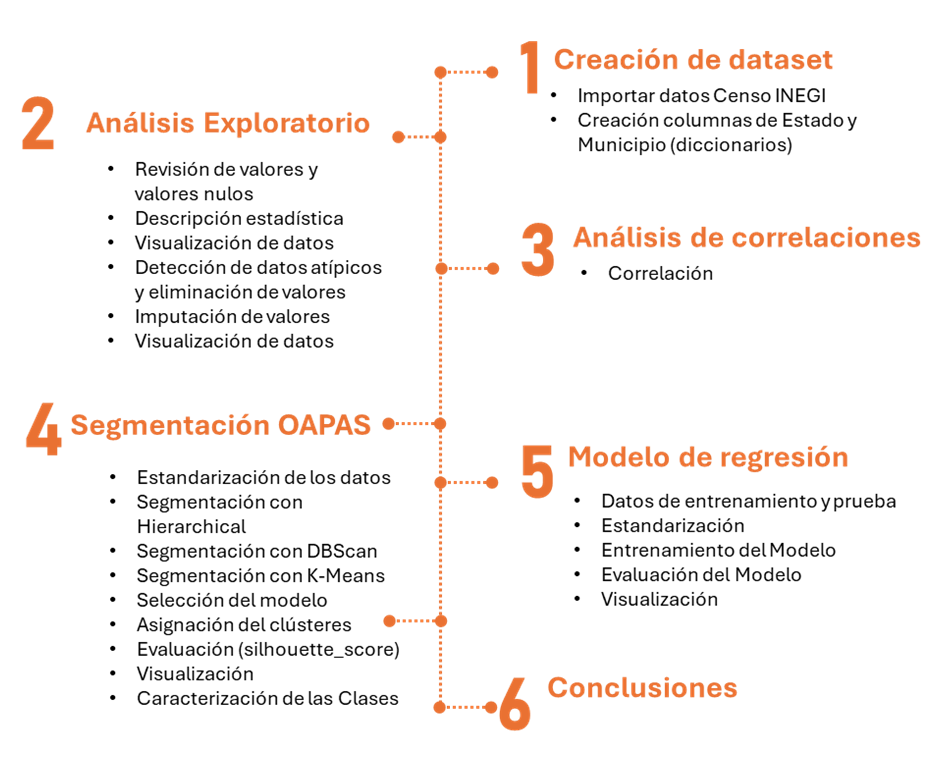

# **Librerías**  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, silhouette_score
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN

pd.set_option("display.float_format", "{:,.3f}".format)

# **1. Creación del dataframe**  
___

### **1.1. Importar datos del Censo de INEGI 2022**

Censo Nacional de Gobiernos Municipales y Demarcaciones Territoriales de la Ciudad de México 2022

* Lectura del archivo: admncion_cngmd2021.xlsx

In [ ]:
url = 'https://github.com/jevabrir/Prediccion_Ingreso_RegMult_OAPAS_Mex_Inegi/raw/main/admncion_cngmd2021_2.xlsx'

df = pd.read_excel(url)  #, sheet_name='Hoja1')
print("El tamaño del df es:", df.shape)
df.head(3)

El tamaño del df es: (2469, 82)


,folio,totl_tom,conx_tot,ext_sani_km,ext_co_km,Pob_dren,Pobl_aPot,con_ex_p,dis_ex_p,res_ex_p,...,sub_fede,sub_esta,sub_muni,multas,ej_anter,total_in,dren_ext,ext_reha,ext_dren,ext_cole
0,1001,"329,552.000","324,115.000",4.866,"2,775.130",98.000,99.000,306.260,"2,468.870",NaN,...,NaN,NaN,NaN,NaN,NaN,"889,622,823.430",NaN,NaN,4.866,974.000
1,1002,"14,473.000","13,738.000","7,087.410",600.000,80.000,70.000,300.000,300.000,2.000,...,NaN,NaN,NaN,NaN,NaN,"914,517.000",NaN,NaN,85.000,85.000
2,1003,"16,871.000","19,288.000",227.800,311.620,98.000,99.000,74.860,236.760,NaN,...,"2,220,575.000",NaN,NaN,"314,296.000","1,464,280.000","42,545,534.000",1.300,NaN,1.520,NaN


### **1.2 Creación de columna con nombre de estado y Municipio**

* A partir de la columna **folio** se crean la columna **cve_ent** que contiene la clave de la entidad federativa:

    - [x] **cve_ent** clave de la entidad federativa  

In [ ]:
df["folio"]=df["folio"].astype(str)

def select_characters(text):
    if len(text) == 4:
        return text[0]     # Selecciona el primer carácter
    elif len(text) == 5:
        return text[:2]    # Selecciona los primeros dos caracteres
    else:
        return text        # No hace nada si la longitud es diferente

df['cve_ent'] = df['folio'].apply(select_characters)

* Se realiza la lectura del archivo **entidad_cngmd2021.csv** censo de INEGI como un dataframe, posteriormente se diseña un diccionario con los nombres y claves del estado. Seguido de lo anterior se genera una función  para generar descripción del estado (con entidad=01 busca en el diccionario de entidades y regresa el nombre del estado, si no lo encuentra, regresa 'Entidad desconocida'), finalmente se implementa la función de generación de descripción a cada fila del DataFrame. Se crea la columna **Name_Ent**.

    - [x] **cve_ent    ------>   Name_Ent** (nombre de la entidad federativa)

In [ ]:
# Leer en formato raw cambiar usuario y rura 'https://raw.githubusercontent.com/usuario/repositorio/main/ruta_al_archivo.csv'
url2= 'https://raw.githubusercontent.com/jevabrir/Prediccion_Ingreso_RegMult_OAPAS_Mex_Inegi/main/entidad_cngmd2021.csv'

df_Edos = pd.read_csv(url2, dtype={'entidad': str})  #La clave se lee como string
df_Edos.head(5)

,entidad,descrip
0,1,Aguascalientes
1,2,Baja California
2,3,Baja California Sur
3,4,Campeche
4,5,Coahuila de Zaragoza


In [ ]:
diccionario_entidad = dict(zip(df_Edos['entidad'],df_Edos['descrip']))  #Convertir el DataFrame df_Clave_Edos en un diccionario

def generar_descripcion_Ent(entidad):
    desc_entidad = diccionario_entidad.get(entidad, 'Entidad desconocida')
    return f'{desc_entidad}'

df['Name_Ent'] = df.apply(lambda row: generar_descripcion_Ent(row['cve_ent']), axis=1)

* Se realiza la lectura del archivo **"mnpio_cngmd2021.csv** censo de INEGI como un dataframe, posteriormente se diseña un diccionario con los nombres y claves del municipio. Seguido de lo anterior se genera una función  para generar descripción del municipio (con municipio=01 busca en el diccionario de municipios y regresa el nombre del municipio, si no lo encuentra, regresa 'Municipio desconocido'), finalmente se implementa la función de generación de descripción a cada fila del DataFrame. Se crea la columna **Name_Mun**.

    - [x] **cve_ent    ------>   Name_Mun** (nombre de la entidad federativa)

In [ ]:
# Leer en formato raw cambiar usuario y rura 'https://raw.githubusercontent.com/usuario/repositorio/main/ruta_al_archivo.csv'
url3= 'https://raw.githubusercontent.com/jevabrir/Prediccion_Ingreso_RegMult_OAPAS_Mex_Inegi/main/mnpio_cngmd2021.csv'
df_Muns = pd.read_csv(url3, dtype={'folio': str})  #La clave se lee como string
df_Muns.head(2)

,folio,descrip,entidad
0,1001,Aguascalientes,1
1,1002,Asientos,1


In [ ]:
diccionario_mun = dict(zip(df_Muns['folio'],df_Muns['descrip']))

def generar_descripcion_Ent(entidad):
    desc_entidad = diccionario_mun.get(entidad, 'Municipio desconocido')
    return f'{desc_entidad}'

df['Name_Mun'] = df.apply(lambda row: generar_descripcion_Ent(row['folio']), axis=1)
df.head(5)

,folio,totl_tom,conx_tot,ext_sani_km,ext_co_km,Pob_dren,Pobl_aPot,con_ex_p,dis_ex_p,res_ex_p,...,multas,ej_anter,total_in,dren_ext,ext_reha,ext_dren,ext_cole,cve_ent,Name_Ent,Name_Mun
0,1001,"329,552.000","324,115.000",4.866,"2,775.130",98.000,99.000,306.260,"2,468.870",NaN,...,NaN,NaN,"889,622,823.430",NaN,NaN,4.866,974.000,1,Aguascalientes,Aguascalientes
1,1002,"14,473.000","13,738.000","7,087.410",600.000,80.000,70.000,300.000,300.000,2.000,...,NaN,NaN,"914,517.000",NaN,NaN,85.000,85.000,1,Aguascalientes,Asientos
2,1003,"16,871.000","19,288.000",227.800,311.620,98.000,99.000,74.860,236.760,NaN,...,"314,296.000","1,464,280.000","42,545,534.000",1.300,NaN,1.520,NaN,1,Aguascalientes,Calvillo
3,1004,"4,333.000","4,333.000",400.000,370.000,98.000,98.000,2.000,368.000,2.000,...,NaN,NaN,"7,223,000.000",NaN,NaN,400.000,NaN,1,Aguascalientes,Cosío
4,1005,"35,095.000","34,851.000",101.600,NaN,96.000,98.000,NaN,NaN,NaN,...,"3,589,099.910","3,589,099.910","110,530,539.220",13.000,NaN,NaN,NaN,1,Aguascalientes,Jesús María


In [ ]:
#df.to_excel('datos.xlsx', index=False, engine='openpyxl')

In [ ]:
#Tipos de datos
df.dtypes

,0
folio,object
totl_tom,float64
conx_tot,float64
ext_sani_km,float64
ext_co_km,float64
...,...
ext_dren,float64
ext_cole,float64
cve_ent,object
Name_Ent,object


# **2. Análisis Exploratorio**  
_____

Creación del dataframe df_df_Analisys1 con las variables seleccionadas para el análisis que son:

**folio  ->**   Indica el identificador de cada cuestionario compuesto por la clave de entidad y por la clave de municipio o delegación  

**total_in  ->**  Indica el ingreso por el suministro de agua potable y saneamiento durante el año 2020 (total de ingresos por suministro de bienes y servicios)  
**totl_tom    ->**   Indica el número total de tomas que cubre el servicio de agua entubada de la red pública  
Archivo: admncion_cngmd2021.xls  

**conx_tot ->**  Indica el total de número de conexiones a la red de drenaje y alcantarillado por tipo de usuario (conx_tot)  
**Pob_dren ->**   Indica el porcentaje de la población del municipio o de la demarcación territorial que tenia acceso al servicio de drenaje y alcantarillado de la red pública (dren_cab)  
Archivo: servdren_cngmd2021.xls

**Pobl_aPot  ->**   Indica el porcentaje de población municipal o demarcación territorial que contaba con acceso al servicio de agua de la red pública (pobl_prc)  
Archivo: servagua_cngmd2021.xls  

In [ ]:
df_Analisys1=df[['totl_tom', 'conx_tot','Pob_dren', 'Pobl_aPot','total_in',
                 'folio', 'cve_ent','Name_Ent', 'Name_Mun']]

print("El tamaño del dataframe para el análisis es:", df_Analisys1.shape)
df_Analisys1.head(2)

El tamaño del dataframe para el análisis es: (2469, 9)


,totl_tom,conx_tot,Pob_dren,Pobl_aPot,total_in,folio,cve_ent,Name_Ent,Name_Mun
0,"329,552.000","324,115.000",98.000,99.000,"889,622,823.430",1001,1,Aguascalientes,Aguascalientes
1,"14,473.000","13,738.000",80.000,70.000,"914,517.000",1002,1,Aguascalientes,Asientos


### **2.1 Revisión de valores y valores nulos**

In [ ]:
df_Analisys1.isnull()
df_Analisys1.isnull().sum()

,0
totl_tom,131
conx_tot,708
Pob_dren,563
Pobl_aPot,57
total_in,692
folio,0
cve_ent,0
Name_Ent,0
Name_Mun,0


In [ ]:
df_Analisys1.count()

,0
totl_tom,2338
conx_tot,1761
Pob_dren,1906
Pobl_aPot,2412
total_in,1777
folio,2469
cve_ent,2469
Name_Ent,2469
Name_Mun,2469


### **2.2 Descripción estadística**

In [ ]:
df_Analisys1.describe().T

,count,mean,std,min,25%,50%,75%,max
totl_tom,"2,338.000","11,617.353","46,772.576",4.000,711.000,"2,051.500","6,000.000","1,170,135.000"
conx_tot,"1,761.000","13,956.785","72,134.443",3.000,680.000,"2,051.000","6,726.000","2,250,000.000"
Pob_dren,"1,906.000",73.816,24.843,0.500,60.000,80.000,94.000,100.000
Pobl_aPot,"2,412.000",77.460,24.791,10.000,70.000,89.000,96.000,100.000
total_in,"1,777.000","50,885,566.946","414,168,338.008",321.000,"160,000.000","1,280,000.000","8,320,415.370","15,094,274,894.000"


### **2.3 Visualización de datos**

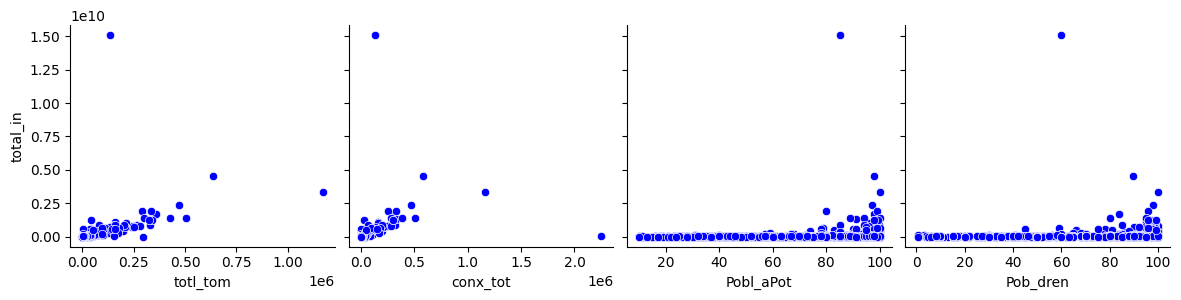

In [ ]:
# @title
# Visualización de los datos
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")  # Suprimir advertencias específicas

Col_Var_x1 =['totl_tom', 'conx_tot','Pobl_aPot','Pob_dren']
Col_Var_y =['total_in']

g = sns.pairplot(df_Analisys1, x_vars=Col_Var_x1, y_vars=Col_Var_y, height=3, plot_kws={'color': 'blue'})

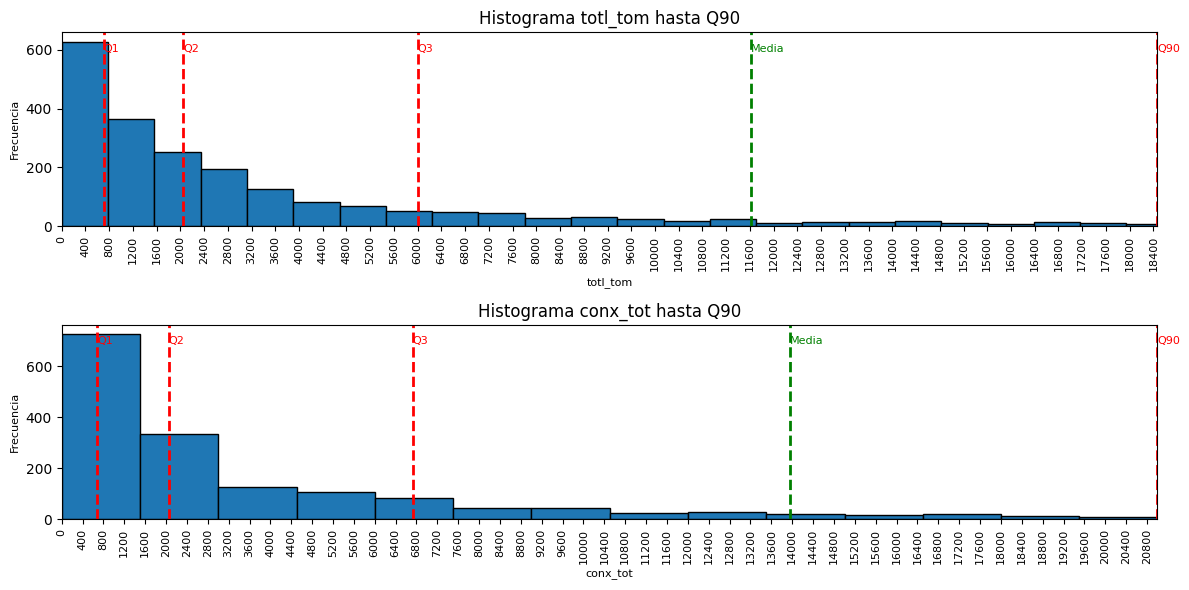

In [ ]:
# @title
import matplotlib.pyplot as plt

# Lista de variables
variables = ['totl_tom','conx_tot']  #, 'Pob_dren', 'Pobl_aPot', 'total_in'

# Tamaño de las etiquetas de los ejes
axis_label_size = 8
x_tick_label_size = 8  # Tamaño de las letras del eje x

# Crear la figura
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

# Definir el intervalo manualmente
intervalo_x = 400  # Cambia este valor según sea necesario

for i, var in enumerate(variables):
    ax = axes[i]

    # Calcular los cuantiles
    Q1 = df[var].quantile(0.25)
    Q2 = df[var].quantile(0.50)
    Q3 = df[var].quantile(0.75)
    Qx = df[var].quantile(0.90)
    Med = df[var].mean()

    numero = 50
    if var in ["totl_tom", "conx_tot"]:
        numero = 1500
    elif var == "total_in":
        numero = 1800

    # Generar el histograma
    ax.hist(df[var], bins=numero, edgecolor='black')
    ax.set_xlim(0, Qx)
    ax.set_title(f'Histograma {var} hasta Q90')
    ax.set_xlabel(var, fontsize=axis_label_size)
    ax.set_ylabel('Frecuencia', fontsize=axis_label_size)
    ax.axvline(Q1, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q1, max(ax.get_ylim()) * 0.9, 'Q1', color='r', fontsize=axis_label_size)
    ax.axvline(Q2, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q2, max(ax.get_ylim()) * 0.9, 'Q2', color='r', fontsize=axis_label_size)
    ax.axvline(Q3, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q3, max(ax.get_ylim()) * 0.9, 'Q3', color='r', fontsize=axis_label_size)
    ax.axvline(Qx, color='r', linestyle='dashed', linewidth=2)
    ax.text(Qx, max(ax.get_ylim()) * 0.9, 'Q90', color='r', fontsize=axis_label_size)
    ax.axvline(Med, color='g', linestyle='dashed', linewidth=2)
    ax.text(Med, max(ax.get_ylim()) * 0.9, 'Media', color='g', fontsize=axis_label_size)

    # Modificar los valores del eje x
    ax.set_xticks(range(0, int(Qx) + 1, intervalo_x))
    ax.set_xticklabels(range(0, int(Qx) + 1, intervalo_x), fontsize=x_tick_label_size, rotation=90)

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()


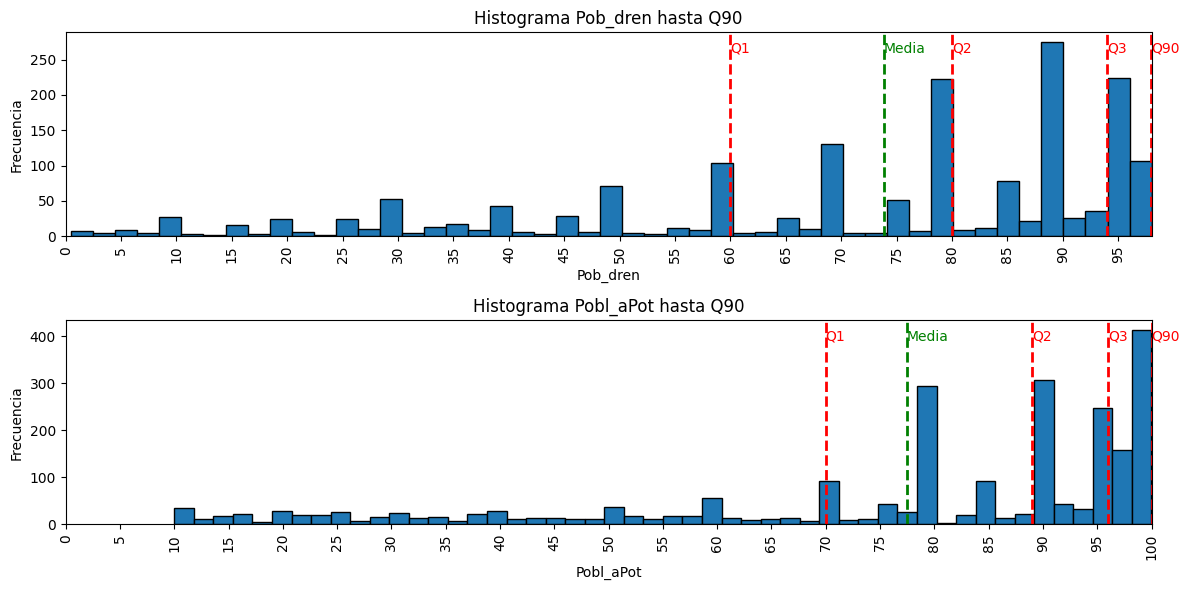

<Figure size 640x480 with 0 Axes>

In [ ]:
# @title
import matplotlib.pyplot as plt

# Lista de variables
variables = ['Pob_dren', 'Pobl_aPot']  #, 'Pob_dren', 'Pobl_aPot', 'total_in'

# Tamaño de las etiquetas de los ejes
axis_label_size = 10
x_tick_label_size = 10  # Tamaño de las letras del eje x

# Crear la figura
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

# Definir el intervalo manualmente
intervalo_x = 5  # Cambia este valor según sea necesario

for i, var in enumerate(variables):
    ax = axes[i]

    # Calcular los cuantiles
    Q1 = df[var].quantile(0.25)
    Q2 = df[var].quantile(0.50)
    Q3 = df[var].quantile(0.75)
    Qx = df[var].quantile(0.90)
    Med = df[var].mean()

    numero = 50

    # Generar el histograma
    ax.hist(df[var], bins=numero, edgecolor='black')
    ax.set_xlim(0, Qx)
    ax.set_title(f'Histograma {var} hasta Q90')
    ax.set_xlabel(var, fontsize=axis_label_size)
    ax.set_ylabel('Frecuencia', fontsize=axis_label_size)
    ax.axvline(Q1, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q1, max(ax.get_ylim()) * 0.9, 'Q1', color='r', fontsize=axis_label_size)
    ax.axvline(Q2, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q2, max(ax.get_ylim()) * 0.9, 'Q2', color='r', fontsize=axis_label_size)
    ax.axvline(Q3, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q3, max(ax.get_ylim()) * 0.9, 'Q3', color='r', fontsize=axis_label_size)
    ax.axvline(Qx, color='r', linestyle='dashed', linewidth=2)
    ax.text(Qx, max(ax.get_ylim()) * 0.9, 'Q90', color='r', fontsize=axis_label_size)
    ax.axvline(Med, color='g', linestyle='dashed', linewidth=2)
    ax.text(Med, max(ax.get_ylim()) * 0.9, 'Media', color='g', fontsize=axis_label_size)

    # Modificar los valores del eje x
    ax.set_xticks(range(0, int(Qx) + 1, intervalo_x))
    ax.set_xticklabels(range(0, int(Qx) + 1, intervalo_x), fontsize=x_tick_label_size, rotation=90)

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()
plt.savefig('histograma_variable.png')

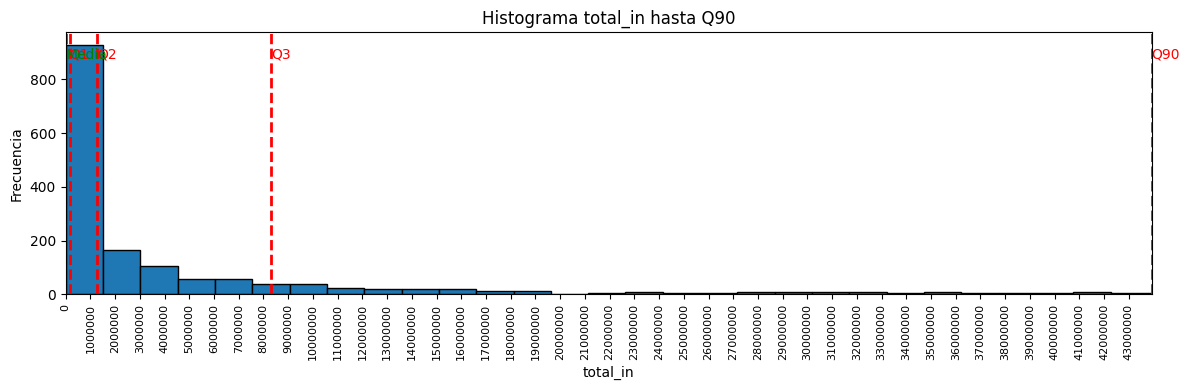

In [ ]:
# @title
import matplotlib.pyplot as plt
# Lista de variables
variables = ['Pob_dren', 'Pobl_aPot','total_in']  #, 'Pob_dren', 'Pobl_aPot', 'total_in'

selected_var = 'total_in'  # Cambia esta variable al nombre de la variable que deseas graficar

# Tamaño de las etiquetas de los ejes
axis_label_size = 10
x_tick_label_size = 8  # Tamaño de las letras del eje x

# Crear la figura
fig, ax = plt.subplots(figsize=(12, 4))

# Definir el intervalo manualmente
intervalo_x = 1000000  # Cambia este valor según sea necesario

# Seleccionar la variable deseada
if selected_var in variables:
    # Calcular los cuantiles
    Q1 = df[selected_var].quantile(0.25)
    Q2 = df[selected_var].quantile(0.50)
    Q3 = df[selected_var].quantile(0.75)
    Qx = df[selected_var].quantile(0.90)
    Med = df[var].mean()
    numero = 10000

    # Generar el histograma
    ax.hist(df[selected_var], bins=numero, edgecolor='black')
    ax.set_xlim(0, Qx)
    ax.set_title(f'Histograma {selected_var} hasta Q90')
    ax.set_xlabel(selected_var, fontsize=axis_label_size)
    ax.set_ylabel('Frecuencia', fontsize=axis_label_size)
    ax.axvline(Q1, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q1, max(ax.get_ylim()) * 0.9, 'Q1', color='r', fontsize=axis_label_size)
    ax.axvline(Q2, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q2, max(ax.get_ylim()) * 0.9, 'Q2', color='r', fontsize=axis_label_size)
    ax.axvline(Q3, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q3, max(ax.get_ylim()) * 0.9, 'Q3', color='r', fontsize=axis_label_size)
    ax.axvline(Qx, color='r', linestyle='dashed', linewidth=2)
    ax.text(Qx, max(ax.get_ylim()) * 0.9, 'Q90', color='r', fontsize=axis_label_size)
    ax.axvline(Med, color='g', linestyle='dashed', linewidth=2)
    ax.text(Med, max(ax.get_ylim()) * 0.9, 'Media', color='g', fontsize=axis_label_size)

    # Modificar los valores del eje x
    ax.set_xticks(range(0, int(Qx) + 1, intervalo_x))
    ax.set_xticklabels(range(0, int(Qx) + 1, intervalo_x), fontsize=x_tick_label_size, rotation=90)

    # Ajustar el layout para evitar solapamientos
    plt.tight_layout()

    # Guardar la gráfica en formato PNG
    #plt.savefig('histograma_variable.png')

    # Mostrar la gráfica
    plt.show()
else:
    print(f'Variable {selected_var} no encontrada en la lista de variables.')


### **2.4 Detección de valores de valores atípicos**

DBScan con GridSearcpara detección de valores de valores atípicos

In [ ]:
df_Analisys0=df[['totl_tom', 'conx_tot', 'ext_sani_km', 'ext_co_km','Pob_dren','Pobl_aPot',"total_in",
                 "folio","cve_ent","Name_Ent","Name_Mun"]].copy()

print("El tamaño del df_Analisys0 es:", df_Analisys0.shape)
df_Analisys0.head(2)

El tamaño del df_Analisys0 es: (2469, 11)


,totl_tom,conx_tot,ext_sani_km,ext_co_km,Pob_dren,Pobl_aPot,total_in,folio,cve_ent,Name_Ent,Name_Mun
0,"329,552.000","324,115.000",4.866,"2,775.130",98.000,99.000,"889,622,823.430",1001,1,Aguascalientes,Aguascalientes
1,"14,473.000","13,738.000","7,087.410",600.000,80.000,70.000,"914,517.000",1002,1,Aguascalientes,Asientos


In [ ]:
df_Analisys0 = df_Analisys0.reset_index(drop=True)

df_Analisys0["totl_tom"].fillna(df_Analisys0["totl_tom"].dropna().median(),inplace=True)
df_Analisys0["conx_tot"].fillna(df_Analisys0["conx_tot"].dropna().median(),inplace=True)
df_Analisys0["ext_sani_km"].fillna(df_Analisys0["ext_sani_km"].dropna().median(),inplace=True)
df_Analisys0["ext_co_km"].fillna(df_Analisys0["ext_co_km"].dropna().median(),inplace=True)
df_Analisys0["Pob_dren"].fillna(df_Analisys0["Pob_dren"].dropna().median(),inplace=True)
df_Analisys0["Pobl_aPot"].fillna(df_Analisys0["Pobl_aPot"].dropna().median(),inplace=True)
df_Analisys0["total_in"].fillna(df_Analisys0["total_in"].dropna().median(),inplace=True)

df_clasif = df_Analisys0.iloc[:, [0,1,4,5,6]].copy()   #2,3,

DB_scaler = StandardScaler()
X_scaled= DB_scaler.fit_transform(df_clasif)

<ipython-input-80-3234aacd90e9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Analisys0["totl_tom"].fillna(df_Analisys0["totl_tom"].dropna().median(),inplace=True)
<ipython-input-80-3234aacd90e9>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [ 0.07535393  0.04931668 -0.01429394 -0.03097143 -0.0495816  -0.03367577
 -0.05501093 -0.07248495  0.12278665  0.40160915  0.49390416  0.49069887
  0.47091166  0.43540289  0.4603061   0.41486624  0.62027768  0.62027768
  0.6951825   0.70947958  0.69815713  0.69627541  0.69627541  0.69179268
  0.73680865  0.76296291  0.75584283  0.75584283  0.75584283  0.71740243
  0.74096595  0.73978823  0.81618518  0.81618518  0.81295655  0.8168792
  0.78517166  0.7834453   0.7834453   0.7834453          nan         nan
  0.82053678  0.82445943  0.82445943  0.82336755  0.82336755  0.82336755
         nan         nan  0.83706706  0.82965842  0.82903368  0.82903368
  0.82903368  0.82903368         nan         nan         nan         nan
  0.83821383  0.83080519  0.83080519  0.83080519         nan         nan
         nan         nan         nan         nan         

Best Parameters: {'eps': 3.5, 'min_samples': 7}
Número de clusters encontrados por DBSCAN: 1
DBScan Clustering Silhouette Score: 0.92


,totl_tom,conx_tot,ext_sani_km,ext_co_km,Pob_dren,Pobl_aPot,total_in,folio,cve_ent,Name_Ent,Name_Mun,cluster_db
14,"637,449.000","578,966.000","4,013.000","4,046.000",89.600,98.000,"4,559,694,557.000",2004,2,Baja California,Tijuana,-1
81,"710,766.000","65,505.000",487.480,579.390,98.000,100.000,"1,280,000.000",6010,6,Colima,Villa de Álvarez,-1
224,"2,051.500","326,729.000","3,108.000","3,806.090",96.000,91.000,"1,326,602,408.470",8019,8,Chihuahua,Chihuahua,-1
577,"1,170,135.000","1,164,305.000","8,577.000","8,570.890",100.000,100.000,"3,299,290,059.000",14039,14,Jalisco,Guadalajara,-1
702,"134,624.000","136,038.000","14,709.000",972.000,60.000,85.000,"15,094,274,894.000",15039,15,Estado de México,Ixtapaluca,-1
913,"14,467.000","2,250,000.000",120.000,169.830,95.000,98.000,"19,268,518.000",17012,17,Morelos,Jojutla,-1


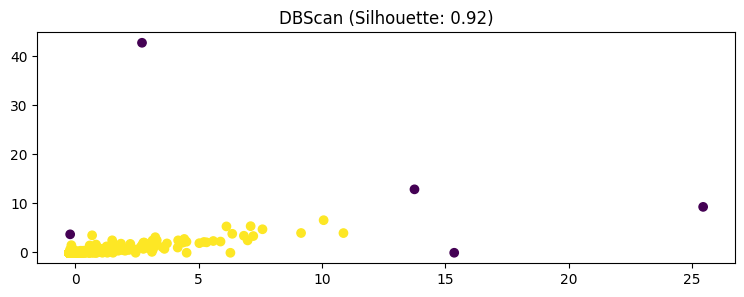

In [ ]:

# Definir una función de métrica personalizada para silhouette score
def silhouette_scorer(estimator, X):
    estimator.fit(X)
    labels = estimator.labels_
    score = silhouette_score(X, labels)
    return score

# Definimos los parámetros epsilon y min_samples que queremos probar
param_grid = {
    'eps': [0.1, 0.5, 1.0, 1.5,2.0,2.5, 3.0,3.5, 4.0,4.5, 5.0,5.25,5.5,5.75,6,6.5,7,7.5,10,25,50,75],
    'min_samples': [2,3,5,6,7,8,9, 10]
}

# Creamos el modelo DBSCAN
dbscan = DBSCAN()

# Creamos un objeto GridSearchCV utilizando la función de métrica personalizada
grid_search = GridSearchCV(estimator=dbscan, param_grid=param_grid, scoring=silhouette_scorer, n_jobs=-1)
grid_search.fit(X_scaled)

# Mejores parámetros encontrados
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Creamos el modelo DBSCAN con los mejores parámetros encontrados
best_eps = best_params['eps']
best_min_samples = best_params['min_samples']
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)

# Ajustamos el modelo DBSCAN a los datos con los mejores parámetros
best_dbscan.fit(X_scaled)
best_labels = best_dbscan.labels_

# Número de clusters encontrados por DBSCAN (ignorando el ruido, si hay)
best_n_clusters = len(set(best_labels)) - (1 if -1 in best_labels else 0)
print(f'Número de clusters encontrados por DBSCAN: {best_n_clusters}')

################################################################# Métrica de silhouette con los mejores parámetros

dbscan_labels = best_dbscan.labels_

DBScan_clus = best_dbscan.fit_predict(X_scaled)
DBScan_best_silhouette = silhouette_score(X_scaled, dbscan_labels)
print(f'DBScan Clustering Silhouette Score: {DBScan_best_silhouette:.2f}')

,totl_tom,conx_tot,ext_sani_km,ext_co_km,Pob_dren,Pobl_aPot,total_in,folio,cve_ent,Name_Ent,Name_Mun,cluster_db
14,"637,449.000","578,966.000","4,013.000","4,046.000",89.600,98.000,"4,559,694,557.000",2004,2,Baja California,Tijuana,-1
81,"710,766.000","65,505.000",487.480,579.390,98.000,100.000,"1,280,000.000",6010,6,Colima,Villa de Álvarez,-1
224,"2,051.500","326,729.000","3,108.000","3,806.090",96.000,91.000,"1,326,602,408.470",8019,8,Chihuahua,Chihuahua,-1
577,"1,170,135.000","1,164,305.000","8,577.000","8,570.890",100.000,100.000,"3,299,290,059.000",14039,14,Jalisco,Guadalajara,-1
702,"134,624.000","136,038.000","14,709.000",972.000,60.000,85.000,"15,094,274,894.000",15039,15,Estado de México,Ixtapaluca,-1
913,"14,467.000","2,250,000.000",120.000,169.830,95.000,98.000,"19,268,518.000",17012,17,Morelos,Jojutla,-1


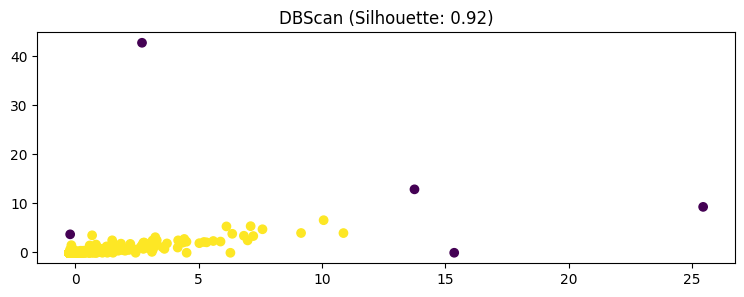

In [ ]:
################################################################  Visualizar los clusters
# DBScan
plt.figure(figsize=(9, 3))
plt.scatter(X_scaled[:, 0], X_scaled[:, 4], c=dbscan_labels, cmap='viridis')
plt.title(f'DBScan (Silhouette: {DBScan_best_silhouette :.2f})')

################################################################  Visualizar los clusters

df_Analisys0["cluster_db"]=dbscan_labels
df_Analisys0["cluster_db"].value_counts()
df_Analisys0[df_Analisys0["cluster_db"]==-1]

### **2.5 Eliminación de valores de valores atípicos**

In [ ]:
df_Analisys1=df[['totl_tom', 'conx_tot', 'Pob_dren','Pobl_aPot',"total_in",  #'ext_sani_km', 'ext_co_km',
                 "folio","cve_ent","Name_Ent","Name_Mun"]].copy()
df_Analisys1 = df_Analisys1.reset_index(drop=True)
print("El tamaño del df_Analisys0 es:", df_Analisys1.shape)

El tamaño del df_Analisys0 es: (2469, 9)


In [ ]:
# Se seleccionaron los siguientes fólios como valores atípicos, después de una revisión manual
# los valores de cada folio se colocaron en la lista valores_folio

valores_folio = ["15039","2115","31002","30104","21051","29007","2016","17012","26062","19043",
                  "30169","21185","28031","17032","7037","15116","11038","30135","14031","20396",
                  "5037","26062","15116","19043","30169","21086","13036","13049","21185",
                  "28031","21057","17032","7037","20351","11038","30135","14031","20396",
                  "5037","7112","26015","20394","29031","8046","30120","21026","17024",
                  "30062","20022","20191","30019","30096","30140","28010","14110","20031",
                  "20361","15115","20051","4002","15056","30178","20492","29008","29007","28026","15110",
                  "2004","6010","8019","14039","15039","17012",             #Con DBScan
                  "31050",   #Con DBScan
                  "20401","8017","22011","22006","32010","22017","30131",     #eliminación manual Final
                  "21114","11020",   #ciudad leon y Puebla
                  "15013","21140","26026","26048","28040","30193", "11041","23004",
                  "30040","30045","11020"]

# Filtra el DataFrame para los folios deseados
df_folios_OutLayers = df[df['folio'].isin(valores_folio)]

# Muestra el resultado
print(df_folios_OutLayers.shape)
df_folios_OutLayers.head(5)

(75, 85)


,folio,totl_tom,conx_tot,ext_sani_km,ext_co_km,Pob_dren,Pobl_aPot,con_ex_p,dis_ex_p,res_ex_p,...,multas,ej_anter,total_in,dren_ext,ext_reha,ext_dren,ext_cole,cve_ent,Name_Ent,Name_Mun
14,2004,"637,449.000","578,966.000","4,013.000","4,046.000",89.600,98.000,"3,096.000",950.000,"1,835.000",...,"93,823,952.000","88,571,393.400","4,559,694,557.000",NaN,NaN,"1,050.000",232.000,2,Baja California,Tijuana
23,4002,"78,447.000",50.000,30.000,628.310,60.000,NaN,161.350,466.960,NaN,...,NaN,"8,875,563.570","203,033,644.440",30.000,NaN,NaN,NaN,4,Campeche,Campeche
70,5037,"2,542.000",25.000,NaN,NaN,10.000,100.000,NaN,NaN,NaN,...,NaN,NaN,"821,718.000",NaN,NaN,NaN,NaN,5,Coahuila de Zaragoza,Villa Unión
81,6010,"710,766.000","65,505.000",487.480,579.390,98.000,100.000,107.060,472.330,NaN,...,NaN,NaN,NaN,NaN,NaN,0.400,0.100,6,Colima,Villa de Álvarez
118,7037,"6,500.000",20.000,30.000,23.000,90.000,85.000,7.000,16.000,NaN,...,NaN,NaN,"235,000.000",20.000,5.000,10.000,NaN,7,Chiapas,Huehuetán


In [ ]:
print( df_Analisys1.shape)
# Eliminar las filas donde el valor de 'folio' está en la lista valores_folio
df_filtrado = df_Analisys1[~df_Analisys1['folio'].isin(valores_folio)]
df_Analisys1=df_filtrado.copy()
print( df_Analisys1.shape)

(2469, 9)
(2394, 9)


In [ ]:
df_Analisys1.describe().T

,count,mean,std,min,25%,50%,75%,max
totl_tom,"2,266.000","9,846.269","31,563.194",4.000,720.000,"2,034.000","5,956.250","428,144.000"
conx_tot,"1,695.000","10,938.087","33,288.860",4.000,746.500,"2,113.000","6,690.500","389,221.000"
Pob_dren,"1,836.000",74.164,24.407,0.600,60.000,80.000,94.000,100.000
Pobl_aPot,"2,339.000",77.375,24.871,10.000,70.000,89.000,96.000,100.000
total_in,"1,723.000","34,677,231.619","147,400,362.613",321.000,"158,370.000","1,271,509.000","7,918,931.150","1,913,074,128.970"


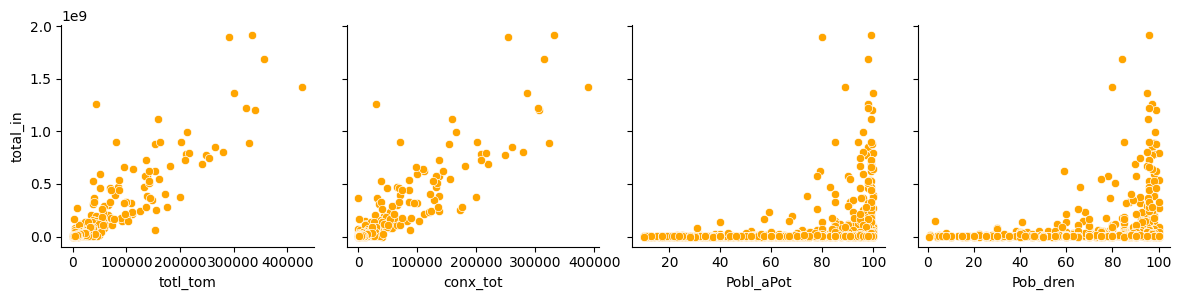

In [ ]:
# Visualización de los datos originales
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")  # Suprimir advertencias específicas

Col_Var_x1 =['totl_tom', 'conx_tot','Pobl_aPot','Pob_dren'] #'ext_sani_km','ext_co_km'
Col_Var_y =['total_in']

g = sns.pairplot(df_Analisys1, x_vars=Col_Var_x1, y_vars=Col_Var_y, height=3, plot_kws={'color': 'orange'})

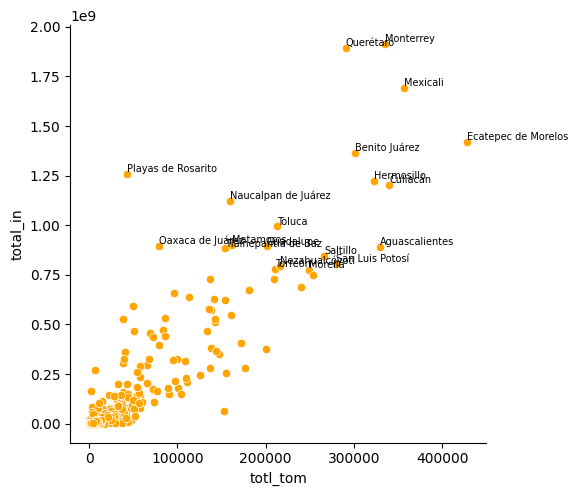

In [ ]:
# @title
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Definir las columnas para las variables
Col_Var_x1 = ['totl_tom']
Col_Var_y = ['total_in']

# Crear la gráfica con seaborn pairplot
g = sns.pairplot(df_Analisys1, x_vars=Col_Var_x1, y_vars=Col_Var_y, height=5, plot_kws={'color': 'orange'})

# Identificar los 20 valores más altos en 'total_in'
top_20_indices = df_Analisys1['total_in'].nlargest(20).index

# Iterar sobre los ejes del pairplot para añadir etiquetas
for i, x_var in enumerate(Col_Var_x1):
    for j, y_var in enumerate(Col_Var_y):
        ax = g.axes[i, j]
        # Agregar etiquetas solo a los puntos con los 20 valores más altos en 'total_in'
        for idx in top_20_indices:
            row = df_Analisys1.loc[idx]
            ax.text(
                row[x_var],
                row[y_var],
                row['Name_Mun'],
                fontsize=7,
                ha='left',
                va='bottom'
            )

# Mostrar la gráfica
plt.show()


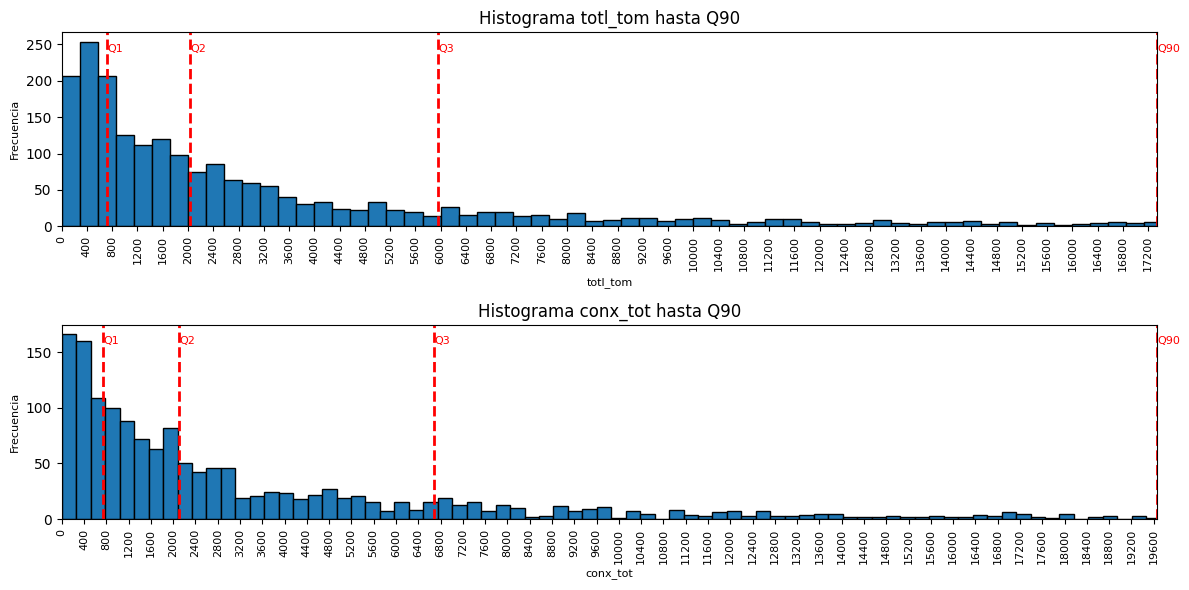

In [ ]:
# @title
import matplotlib.pyplot as plt

# Lista de variables
variables = ['totl_tom','conx_tot']  #, 'Pob_dren', 'Pobl_aPot', 'total_in'

# Tamaño de las etiquetas de los ejes
axis_label_size = 8
x_tick_label_size = 8  # Tamaño de las letras del eje x

# Crear la figura
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

# Definir el intervalo manualmente
intervalo_x = 400  # Cambia este valor según sea necesario

for i, var in enumerate(variables):
    ax = axes[i]

    # Calcular los cuantiles
    Q1 = df_Analisys1[var].quantile(0.25)
    Q2 = df_Analisys1[var].quantile(0.50)
    Q3 = df_Analisys1[var].quantile(0.75)
    Qx = df_Analisys1[var].quantile(0.90)

    numero = 50
    if var in ["totl_tom", "conx_tot"]:
        numero = 1500
    elif var == "total_in":
        numero = 1800

    # Generar el histograma
    ax.hist(df_Analisys1[var], bins=numero, edgecolor='black')
    ax.set_xlim(0, Qx)
    ax.set_title(f'Histograma {var} hasta Q90')
    ax.set_xlabel(var, fontsize=axis_label_size)
    ax.set_ylabel('Frecuencia', fontsize=axis_label_size)
    ax.axvline(Q1, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q1, max(ax.get_ylim()) * 0.9, 'Q1', color='r', fontsize=axis_label_size)
    ax.axvline(Q2, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q2, max(ax.get_ylim()) * 0.9, 'Q2', color='r', fontsize=axis_label_size)
    ax.axvline(Q3, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q3, max(ax.get_ylim()) * 0.9, 'Q3', color='r', fontsize=axis_label_size)
    ax.axvline(Qx, color='r', linestyle='dashed', linewidth=2)
    ax.text(Qx, max(ax.get_ylim()) * 0.9, 'Q90', color='r', fontsize=axis_label_size)

    # Modificar los valores del eje x
    ax.set_xticks(range(0, int(Qx) + 1, intervalo_x))
    ax.set_xticklabels(range(0, int(Qx) + 1, intervalo_x), fontsize=x_tick_label_size, rotation=90)

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

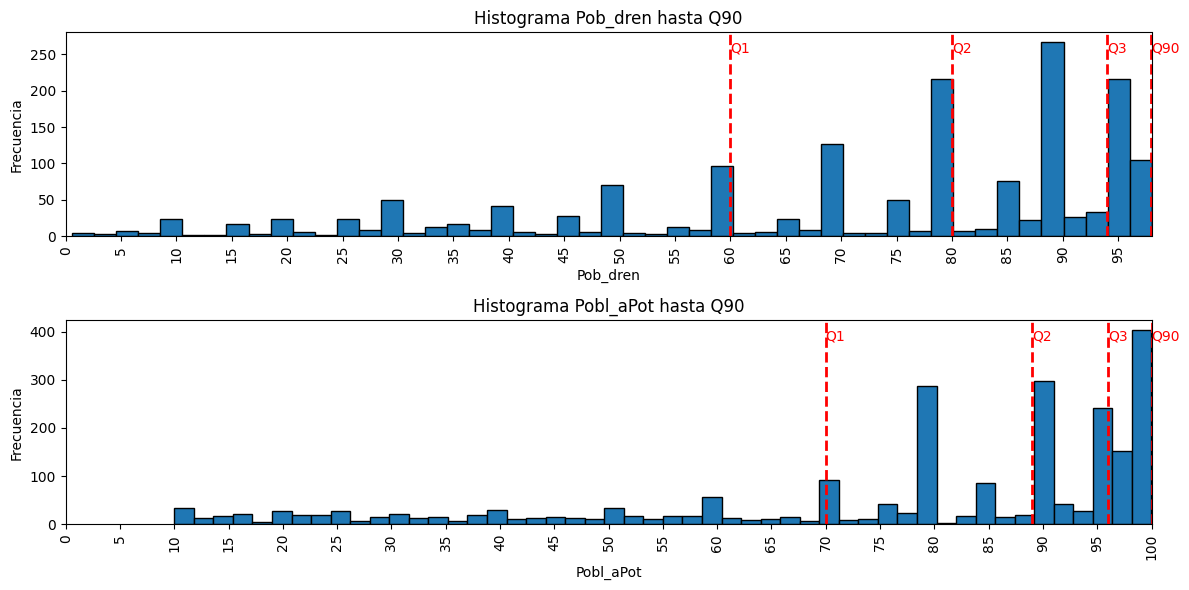

<Figure size 640x480 with 0 Axes>

In [ ]:
# @title
import matplotlib.pyplot as plt

# Lista de variables
variables = ['Pob_dren', 'Pobl_aPot']  #, 'Pob_dren', 'Pobl_aPot', 'total_in'

# Tamaño de las etiquetas de los ejes
axis_label_size = 10
x_tick_label_size = 10  # Tamaño de las letras del eje x

# Crear la figura
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

# Definir el intervalo manualmente
intervalo_x = 5  # Cambia este valor según sea necesario

for i, var in enumerate(variables):
    ax = axes[i]

    # Calcular los cuantiles
    Q1 = df_Analisys1[var].quantile(0.25)
    Q2 = df_Analisys1[var].quantile(0.50)
    Q3 = df_Analisys1[var].quantile(0.75)
    Qx = df_Analisys1[var].quantile(0.90)

    numero = 50

    # Generar el histograma
    ax.hist(df_Analisys1[var], bins=numero, edgecolor='black')
    ax.set_xlim(0, Qx)
    ax.set_title(f'Histograma {var} hasta Q90')
    ax.set_xlabel(var, fontsize=axis_label_size)
    ax.set_ylabel('Frecuencia', fontsize=axis_label_size)
    ax.axvline(Q1, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q1, max(ax.get_ylim()) * 0.9, 'Q1', color='r', fontsize=axis_label_size)
    ax.axvline(Q2, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q2, max(ax.get_ylim()) * 0.9, 'Q2', color='r', fontsize=axis_label_size)
    ax.axvline(Q3, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q3, max(ax.get_ylim()) * 0.9, 'Q3', color='r', fontsize=axis_label_size)
    ax.axvline(Qx, color='r', linestyle='dashed', linewidth=2)
    ax.text(Qx, max(ax.get_ylim()) * 0.9, 'Q90', color='r', fontsize=axis_label_size)

    # Modificar los valores del eje x
    ax.set_xticks(range(0, int(Qx) + 1, intervalo_x))
    ax.set_xticklabels(range(0, int(Qx) + 1, intervalo_x), fontsize=x_tick_label_size, rotation=90)

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()
plt.savefig('histograma_variable.png')

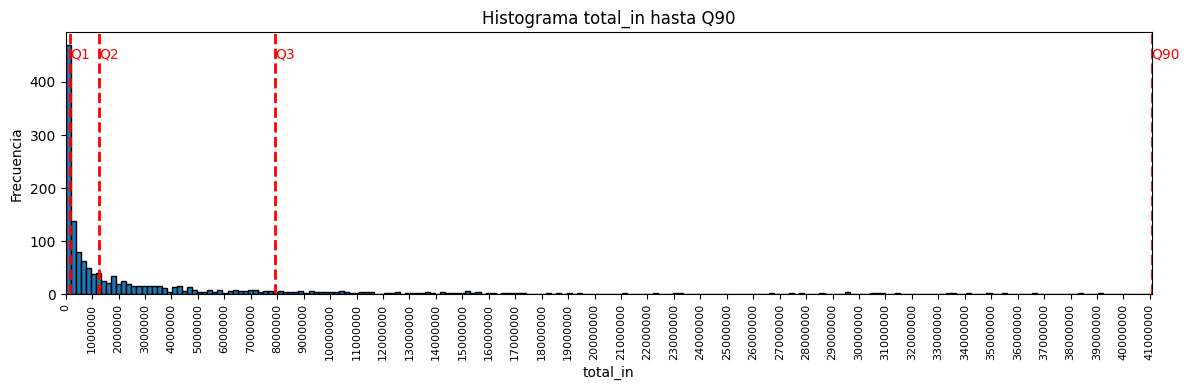

In [ ]:
# @title
import matplotlib.pyplot as plt
# Lista de variables
variables = ['Pob_dren', 'Pobl_aPot','total_in']  #, 'Pob_dren', 'Pobl_aPot', 'total_in'

selected_var = 'total_in'  # Cambia esta variable al nombre de la variable que deseas graficar

# Tamaño de las etiquetas de los ejes
axis_label_size = 10
x_tick_label_size = 8  # Tamaño de las letras del eje x

# Crear la figura
fig, ax = plt.subplots(figsize=(12, 4))

# Definir el intervalo manualmente
intervalo_x = 1000000  # Cambia este valor según sea necesario

# Seleccionar la variable deseada
if selected_var in variables:
    # Calcular los cuantiles
    Q1 = df_Analisys1[selected_var].quantile(0.25)
    Q2 = df_Analisys1[selected_var].quantile(0.50)
    Q3 = df_Analisys1[selected_var].quantile(0.75)
    Qx = df_Analisys1[selected_var].quantile(0.90)

    numero = 10000

    # Generar el histograma
    ax.hist(df_Analisys1[selected_var], bins=numero, edgecolor='black')
    ax.set_xlim(0, Qx)
    ax.set_title(f'Histograma {selected_var} hasta Q90')
    ax.set_xlabel(selected_var, fontsize=axis_label_size)
    ax.set_ylabel('Frecuencia', fontsize=axis_label_size)
    ax.axvline(Q1, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q1, max(ax.get_ylim()) * 0.9, 'Q1', color='r', fontsize=axis_label_size)
    ax.axvline(Q2, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q2, max(ax.get_ylim()) * 0.9, 'Q2', color='r', fontsize=axis_label_size)
    ax.axvline(Q3, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q3, max(ax.get_ylim()) * 0.9, 'Q3', color='r', fontsize=axis_label_size)
    ax.axvline(Qx, color='r', linestyle='dashed', linewidth=2)
    ax.text(Qx, max(ax.get_ylim()) * 0.9, 'Q90', color='r', fontsize=axis_label_size)

    # Modificar los valores del eje x
    ax.set_xticks(range(0, int(Qx) + 1, intervalo_x))
    ax.set_xticklabels(range(0, int(Qx) + 1, intervalo_x), fontsize=x_tick_label_size, rotation=90)

    # Ajustar el layout para evitar solapamientos
    plt.tight_layout()

    # Guardar la gráfica en formato PNG
    plt.savefig('histograma_variable.png')

    # Mostrar la gráfica
    plt.show()
else:
    print(f'Variable {selected_var} no encontrada en la lista de variables.')


### **2.6 Imputación de valores**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

### Imputar valores de "conx_tot" en función de "totl_tom"

for i in df_Analisys1["totl_tom"]:
    if i<=800:
        df_Analisys1["conx_tot"].fillna(380,inplace=True)
    if 800<i<=1200:
        df_Analisys1["conx_tot"].fillna(1000,inplace=True)
    if 1200<i<=2000:
        df_Analisys1["conx_tot"].fillna(1400,inplace=True)
    if 2000<i<=2800:
        df_Analisys1["conx_tot"].fillna(2300,inplace=True)
    if 2800<i<=4000:
        df_Analisys1["conx_tot"].fillna(3400,inplace=True)
    if 4000<i<=5500:
        df_Analisys1["conx_tot"].fillna(4400,inplace=True)
    if 5500<i<=7800:
        df_Analisys1["conx_tot"].fillna(5600,inplace=True)
    if 7800<i<=12000:
        df_Analisys1["conx_tot"].fillna(8800,inplace=True)
    if i > 12000:
        df_Analisys1.loc[df_Analisys1["conx_tot"].isna(), "conx_tot"] = (1.1129 * (df_Analisys1["totl_tom"] - 12000) + 12000+1360)

df_Analisys1["conx_tot"].fillna(df_Analisys1["conx_tot"].dropna().median(),inplace=True)

In [ ]:
### Imputar valores de "totl_tom" en función de "conx_tot"

for i in df_Analisys1["conx_tot"]:
    if i<=800:
        df_Analisys1["totl_tom"].fillna(400,inplace=True)
    if 800<i<=2000:
        df_Analisys1["totl_tom"].fillna(12400,inplace=True)
    if 2000<i<=3200:
        df_Analisys1["totl_tom"].fillna(2400,inplace=True)
    if 3200<i<=4400:
        df_Analisys1["totl_tom"].fillna(3600,inplace=True)
    if 4400<i<=5500:
        df_Analisys1["totl_tom"].fillna(4400,inplace=True)
    if 5500<i<=7500:
        df_Analisys1["totl_tom"].fillna(5600,inplace=True)
    if 7500<i<=10000:
        df_Analisys1["totl_tom"].fillna(7600,inplace=True)
    if 10000<i<=12800:
        df_Analisys1["totl_tom"].fillna(10000,inplace=True)
    if 12800<i<=15600:
        df_Analisys1["totl_tom"].fillna(12800,inplace=True)
    if 15600<i<=24000:
        df_Analisys1["totl_tom"].fillna(15600,inplace=True)
    if i > 24000:
        df_Analisys1.loc[df_Analisys1["totl_tom"].isna(), "totl_tom"] = (1.1129 * (df_Analisys1["conx_tot"] - 24000) + 24000+2710)

df_Analisys1["totl_tom"].fillna(df_Analisys1["totl_tom"].dropna().median(),inplace=True)

In [ ]:

#Imputar valores
#df_Analisys1["totl_tom"].fillna(df_Analisys1["totl_tom"].dropna().median(),inplace=True)
#df_Analisys1["conx_tot"].fillna(df_Analisys1["conx_tot"].dropna().median(),inplace=True)
#df_Analisys1["ext_sani_km"].fillna(df_Analisys1["ext_sani_km"].dropna().median(),inplace=True)
#df_Analisys1["ext_co_km"].fillna(df_Analisys1["ext_co_km"].dropna().median(),inplace=True)
df_Analisys1["Pob_dren"].fillna(df_Analisys1["Pob_dren"].dropna().median(),inplace=True)
df_Analisys1["Pobl_aPot"].fillna(df_Analisys1["Pobl_aPot"].dropna().median(),inplace=True)
df_Analisys1["total_in"].fillna(df_Analisys1["total_in"].dropna().median(),inplace=True)


In [ ]:
df_Analisys1.describe().T

,count,mean,std,min,25%,50%,75%,max
totl_tom,"2,394.000","9,619.802","30,878.242",4.000,753.250,"2,147.500","5,527.500","428,144.000"
conx_tot,"2,394.000","8,837.775","29,300.103",4.000,600.000,"1,859.000","4,869.250","389,221.000"
Pob_dren,"2,394.000",75.524,21.514,0.600,70.000,80.000,90.000,100.000
Pobl_aPot,"2,394.000",77.642,24.645,10.000,70.000,89.000,95.000,100.000
total_in,"2,394.000","25,314,140.609","125,935,838.495",321.000,"365,280.000","1,271,509.000","3,755,738.155","1,913,074,128.970"


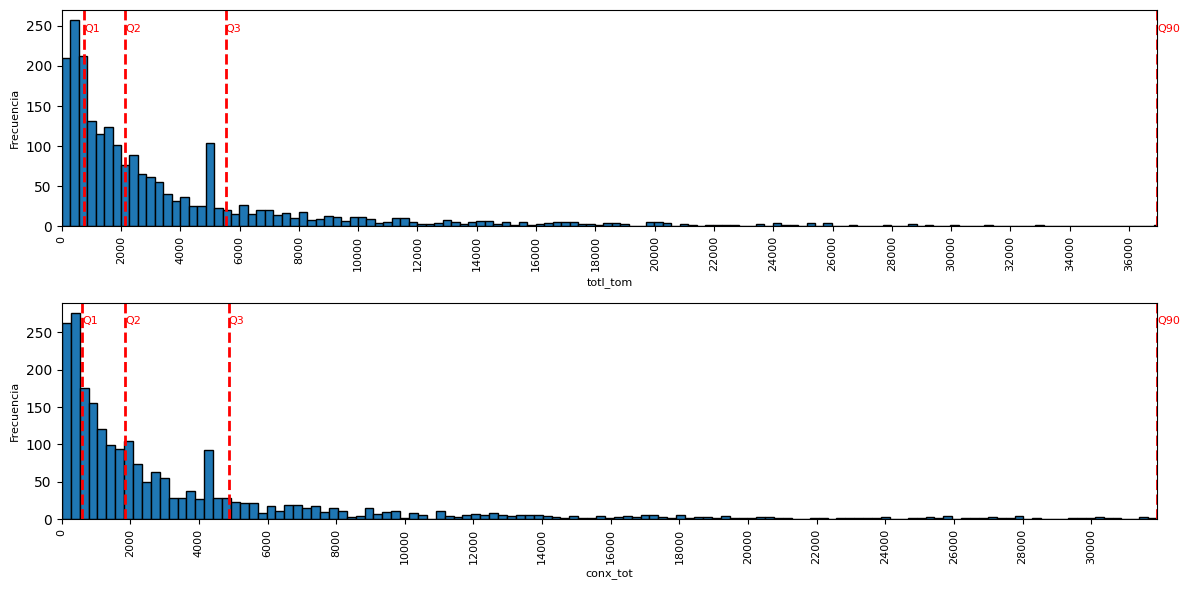

In [ ]:
# @title
import matplotlib.pyplot as plt

# Lista de variables
variables = ['totl_tom','conx_tot']  #, 'Pob_dren', 'Pobl_aPot', 'total_in'

# Tamaño de las etiquetas de los ejes
axis_label_size = 8
x_tick_label_size = 8  # Tamaño de las letras del eje x

# Crear la figura
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

# Definir el intervalo texto ejes
intervalo_x = 2000  # Cambia este valor según sea necesario

for i, var in enumerate(variables):
    ax = axes[i]

    # Calcular los cuantiles
    Q1 = df_Analisys1[var].quantile(0.25)
    Q2 = df_Analisys1[var].quantile(0.50)
    Q3 = df_Analisys1[var].quantile(0.75)
    Qx = df_Analisys1[var].quantile(.95)

    numero = 1500
    # Generar el histograma
    ax.hist(df_Analisys1[var], bins=numero, edgecolor='black')
    ax.set_xlim(Q3, Qx)
    #ax.set_title(f'Histograma {var} hasta Q90')
    ax.set_xlabel(var, fontsize=axis_label_size)
    ax.set_ylabel('Frecuencia', fontsize=axis_label_size)
    ax.axvline(Q1, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q1, max(ax.get_ylim()) * 0.9, 'Q1', color='r', fontsize=axis_label_size)
    ax.axvline(Q2, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q2, max(ax.get_ylim()) * 0.9, 'Q2', color='r', fontsize=axis_label_size)
    ax.axvline(Q3, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q3, max(ax.get_ylim()) * 0.9, 'Q3', color='r', fontsize=axis_label_size)
    ax.axvline(Qx, color='r', linestyle='dashed', linewidth=2)
    ax.text(Qx, max(ax.get_ylim()) * 0.9, 'Q90', color='r', fontsize=axis_label_size)

    # Modificar los valores del eje x
    ax.set_xticks(range(0, int(Qx) + 1, intervalo_x))
    ax.set_xticklabels(range(0, int(Qx) + 1, intervalo_x), fontsize=x_tick_label_size, rotation=90)

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

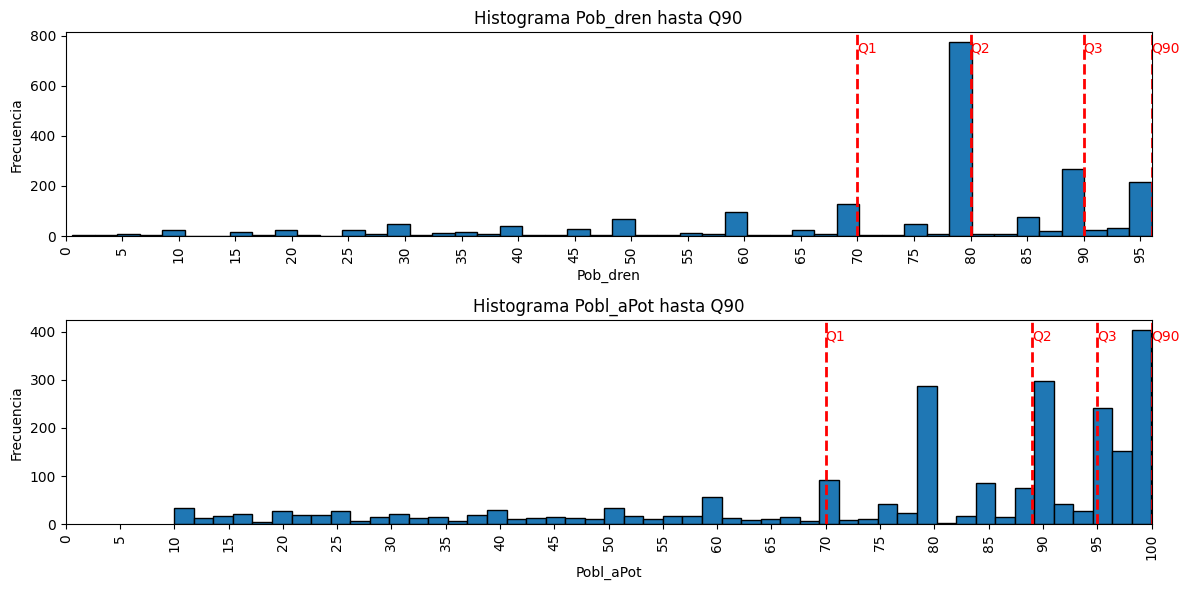

<Figure size 640x480 with 0 Axes>

In [ ]:
# @title
import matplotlib.pyplot as plt

# Lista de variables
variables = ['Pob_dren', 'Pobl_aPot']  #, 'Pob_dren', 'Pobl_aPot', 'total_in'

# Tamaño de las etiquetas de los ejes
axis_label_size = 10
x_tick_label_size = 10  # Tamaño de las letras del eje x

# Crear la figura
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

# Definir el intervalo manualmente
intervalo_x = 5  # Cambia este valor según sea necesario

for i, var in enumerate(variables):
    ax = axes[i]

    # Calcular los cuantiles
    Q1 = df_Analisys1[var].quantile(0.25)
    Q2 = df_Analisys1[var].quantile(0.50)
    Q3 = df_Analisys1[var].quantile(0.75)
    Qx = df_Analisys1[var].quantile(0.90)

    numero = 50

    # Generar el histograma
    ax.hist(df_Analisys1[var], bins=numero, edgecolor='black')
    ax.set_xlim(0, Qx)
    ax.set_title(f'Histograma {var} hasta Q90')
    ax.set_xlabel(var, fontsize=axis_label_size)
    ax.set_ylabel('Frecuencia', fontsize=axis_label_size)
    ax.axvline(Q1, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q1, max(ax.get_ylim()) * 0.9, 'Q1', color='r', fontsize=axis_label_size)
    ax.axvline(Q2, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q2, max(ax.get_ylim()) * 0.9, 'Q2', color='r', fontsize=axis_label_size)
    ax.axvline(Q3, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q3, max(ax.get_ylim()) * 0.9, 'Q3', color='r', fontsize=axis_label_size)
    ax.axvline(Qx, color='r', linestyle='dashed', linewidth=2)
    ax.text(Qx, max(ax.get_ylim()) * 0.9, 'Q90', color='r', fontsize=axis_label_size)

    # Modificar los valores del eje x
    ax.set_xticks(range(0, int(Qx) + 1, intervalo_x))
    ax.set_xticklabels(range(0, int(Qx) + 1, intervalo_x), fontsize=x_tick_label_size, rotation=90)

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()
plt.savefig('histograma_variable.png')

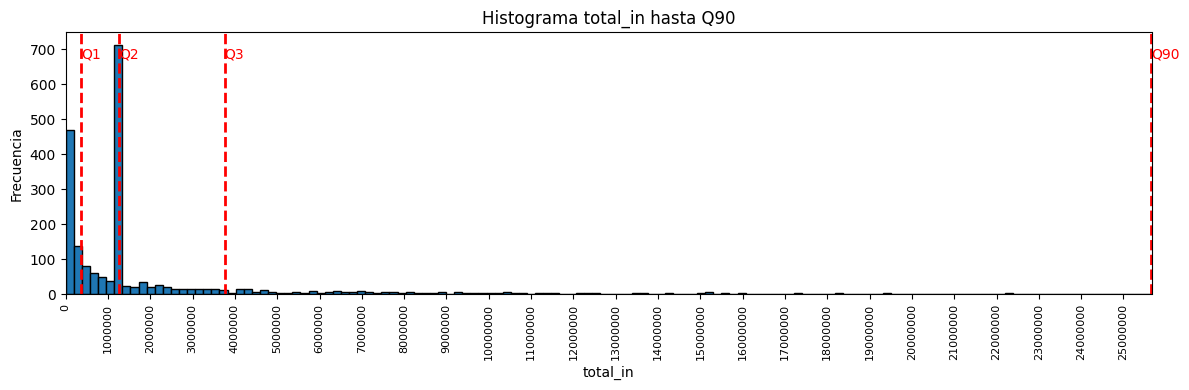

In [ ]:
# @title
import matplotlib.pyplot as plt
# Lista de variables
variables = ['Pob_dren', 'Pobl_aPot','total_in']  #, 'Pob_dren', 'Pobl_aPot', 'total_in'

selected_var = 'total_in'  # Cambia esta variable al nombre de la variable que deseas graficar

# Tamaño de las etiquetas de los ejes
axis_label_size = 10
x_tick_label_size = 8  # Tamaño de las letras del eje x

# Crear la figura
fig, ax = plt.subplots(figsize=(12, 4))

# Definir el intervalo manualmente
intervalo_x = 1000000  # Cambia este valor según sea necesario

# Seleccionar la variable deseada
if selected_var in variables:
    # Calcular los cuantiles
    Q1 = df_Analisys1[selected_var].quantile(0.25)
    Q2 = df_Analisys1[selected_var].quantile(0.50)
    Q3 = df_Analisys1[selected_var].quantile(0.75)
    Qx = df_Analisys1[selected_var].quantile(0.90)

    numero = 10000

    # Generar el histograma
    ax.hist(df_Analisys1[selected_var], bins=numero, edgecolor='black')
    ax.set_xlim(0, Qx)
    ax.set_title(f'Histograma {selected_var} hasta Q90')
    ax.set_xlabel(selected_var, fontsize=axis_label_size)
    ax.set_ylabel('Frecuencia', fontsize=axis_label_size)
    ax.axvline(Q1, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q1, max(ax.get_ylim()) * 0.9, 'Q1', color='r', fontsize=axis_label_size)
    ax.axvline(Q2, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q2, max(ax.get_ylim()) * 0.9, 'Q2', color='r', fontsize=axis_label_size)
    ax.axvline(Q3, color='r', linestyle='dashed', linewidth=2)
    ax.text(Q3, max(ax.get_ylim()) * 0.9, 'Q3', color='r', fontsize=axis_label_size)
    ax.axvline(Qx, color='r', linestyle='dashed', linewidth=2)
    ax.text(Qx, max(ax.get_ylim()) * 0.9, 'Q90', color='r', fontsize=axis_label_size)

    # Modificar los valores del eje x
    ax.set_xticks(range(0, int(Qx) + 1, intervalo_x))
    ax.set_xticklabels(range(0, int(Qx) + 1, intervalo_x), fontsize=x_tick_label_size, rotation=90)

    # Ajustar el layout para evitar solapamientos
    plt.tight_layout()

    # Guardar la gráfica en formato PNG
    plt.savefig('histograma_variable.png')

    # Mostrar la gráfica
    plt.show()
else:
    print(f'Variable {selected_var} no encontrada en la lista de variables.')

### **2.6 Visualización de datos (datos Imputados)**

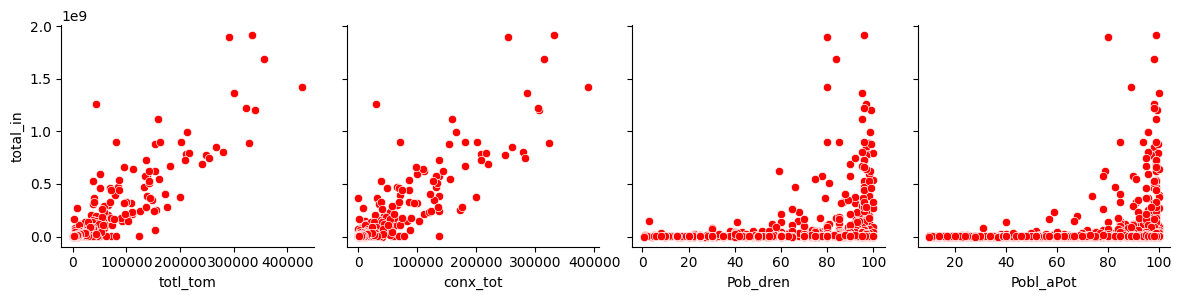

In [ ]:
# @title
# Visualización de los datos
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")  # Suprimir advertencias específicas

Col_Var_x1 =['totl_tom', 'conx_tot','Pob_dren', 'Pobl_aPot']   #'ext_sani_km','ext_co_km',
Col_Var_y =['total_in']

g = sns.pairplot(df_Analisys1, x_vars=Col_Var_x1, y_vars=Col_Var_y, height=3, plot_kws={'color': 'red'})

# **3. Análisis de correlaciones**  
_____

### **3.1 Matriz de correlacions**

In [ ]:
df_Analisys1_Num= df_Analisys1[['totl_tom', 'conx_tot',              #'ext_sani_km', 'ext_co_km',
                     'Pob_dren', 'Pobl_aPot','total_in']]
# 1) Cálculo de las correlaciones pareadas en forma de tabla y en una imagen
correlation_matrix = df_Analisys1_Num.corr()

correlation_matrix


,totl_tom,conx_tot,Pob_dren,Pobl_aPot,total_in
totl_tom,1.000,0.986,0.139,0.154,0.899
conx_tot,0.986,1.000,0.152,0.149,0.892
Pob_dren,0.139,0.152,1.000,0.361,0.124
Pobl_aPot,0.154,0.149,0.361,1.000,0.124
total_in,0.899,0.892,0.124,0.124,1.000


### **3.2 Mapa de calor de las correlaciones**

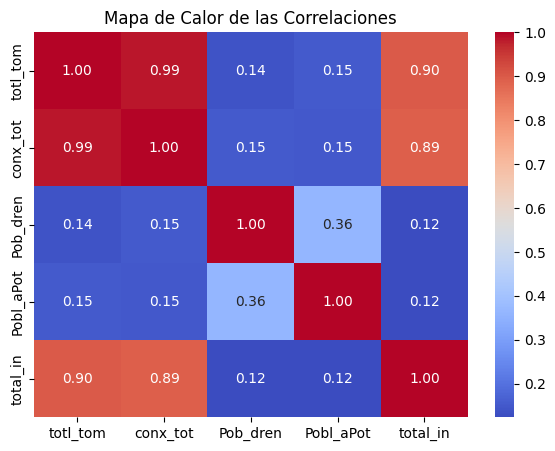

In [ ]:

# Mapa de calor de las correlaciones
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de las Correlaciones')
plt.show()

# **4. Pre procesamiento**  
_____

In [ ]:
# Revisión de valores nulos nuevamente
df_Analisys1.isnull().sum()

,0
totl_tom,0
conx_tot,0
Pob_dren,0
Pobl_aPot,0
total_in,0
folio,0
cve_ent,0
Name_Ent,0
Name_Mun,0


In [ ]:
df_Analisys1.count()

,0
totl_tom,2394
conx_tot,2394
Pob_dren,2394
Pobl_aPot,2394
total_in,2394
folio,2394
cve_ent,2394
Name_Ent,2394
Name_Mun,2394


#### **4.1 Estandarización**

In [ ]:
df_clasif = df_Analisys1.iloc[:, [0,1,2,3,4]].copy() #,5,6

SSscaler = StandardScaler()
X_scaled= SSscaler.fit_transform(df_clasif)

#MMscaler =  MinMaxScaler()
#X_train_MMS = MMscaler.fit_transform(X_train)
#X_test_MMS  = MMscaler.transform(X_test)

# **5. Modelos de clasificación**  
_____

### **5.1 Segmentación con DBScan**

In [ ]:
warnings.filterwarnings("ignore")   # Ignorar todos los warnings
warnings.filterwarnings("ignore", category=UserWarning)  # Ignorar solo los UserWarnings específicos

# Definir una función de métrica personalizada para silhouette score
def silhouette_scorer(estimator, X):
    estimator.fit(X)
    labels = estimator.labels_
    score = silhouette_score(X, labels)
    return score

# Supongamos que X_scaled contiene tus datos escalados
##################################################### 5.5 y 5.... encuentra 3 clusters

# Definimos los parámetros epsilon y min_samples que queremos probar
param_grid = {
    'eps': [0.1,  1.0, 2.0,3.0, 4.0, 5.0,6,7,7.25,7.5,7.75,8,8.5,9,9.5,10,25,50],
    'min_samples': [2,3,5,6,7,8,9, 10,20,30,40,100,200,500]
}

# Creamos el modelo DBSCAN
dbscan = DBSCAN()

# Creamos un objeto GridSearchCV utilizando la función de métrica personalizada
grid_search = GridSearchCV(estimator=dbscan, param_grid=param_grid, scoring=silhouette_scorer, n_jobs=-1)
grid_search.fit(X_scaled)

# Mejores parámetros encontrados
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Creamos el modelo DBSCAN con los mejores parámetros encontrados
best_eps = best_params['eps']
best_min_samples = best_params['min_samples']
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)

# Ajustamos el modelo DBSCAN a los datos con los mejores parámetros
best_dbscan.fit(X_scaled)
best_labels = best_dbscan.labels_

# Número de clusters encontrados por DBSCAN (ignorando el ruido, si hay)
best_n_clusters = len(set(best_labels)) - (1 if -1 in best_labels else 0)
print(f'Número de clusters encontrados por DBSCAN: {best_n_clusters}')


Best Parameters: {'eps': 7, 'min_samples': 40}
Número de clusters encontrados por DBSCAN: 1


In [ ]:
dbscan_labels = best_dbscan.labels_

Text(0.5, 1.0, 'DBScan (Silhouette: 0.92)')

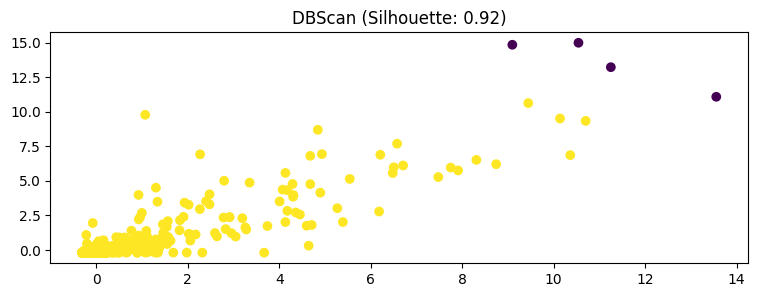

In [ ]:
DBScan_clus = best_dbscan.fit_predict(X_scaled)
#DBScan_best_silhouette = silhouette_scorer(X_scaled, DBScan_clus )
#print(f'DBScan Clustering Silhouette Score: {DBScan_best_silhouette:.2f}')

################################################################  Visualizar los clusters
# DBScan
plt.figure(figsize=(9, 3))
plt.scatter(X_scaled[:, 0], X_scaled[:, 4], c=dbscan_labels, cmap='viridis')
plt.title(f'DBScan (Silhouette: {DBScan_best_silhouette :.2f})')

################################################################  Visualizar los clusters


In [ ]:
df_Analisys1["cluster_db"]=dbscan_labels
df_Analisys1["cluster_db"].value_counts()
df_Analisys1[df_Analisys1["cluster_db"]==-1]

,totl_tom,conx_tot,Pob_dren,Pobl_aPot,total_in,folio,cve_ent,Name_Ent,Name_Mun,cluster_db
12,"356,964.000","315,632.000",84.000,98.000,"1,690,761,382.000",2002,2,Baja California,Mexicali,-1
696,"428,144.000","389,221.000",80.000,89.000,"1,420,984,395.000",15033,15,Estado de México,Ecatepec de Morelos,-1
996,"335,097.000","331,865.000",96.000,99.000,"1,913,074,128.970",19039,19,Nuevo León,Monterrey,-1
1809,"290,449.000","254,564.000",80.000,80.000,"1,895,036,863.000",22014,22,Querétaro,Querétaro,-1


In [ ]:
df_Analisys1["cluster_db"].value_counts()

,count
cluster_db,
0,2390
-1,4


Valores eliminados  15013,21140,26026,26048,28040,30193

### **5.2 Segmentación con KMeans y  Hierarchical**

In [ ]:
##### Aplicar K-Means
kmeans = KMeans(n_clusters=5, random_state=42,n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f'K-Means Silhouette Score: {kmeans_silhouette:.2f}')

K-Means Silhouette Score: 0.51


In [ ]:
################################################################# Aplicar Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict(X_scaled)
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)
print(f'Hierarchical Clustering Silhouette Score: {hierarchical_silhouette:.2f}')

Hierarchical Clustering Silhouette Score: 0.50


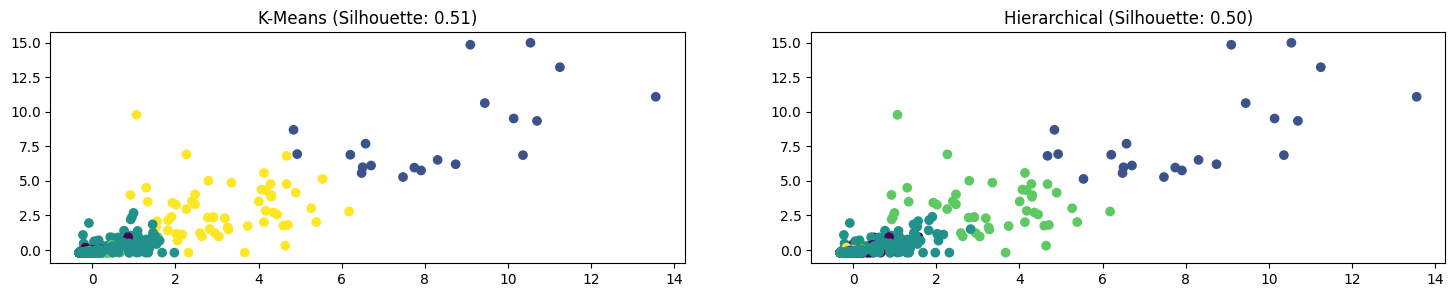

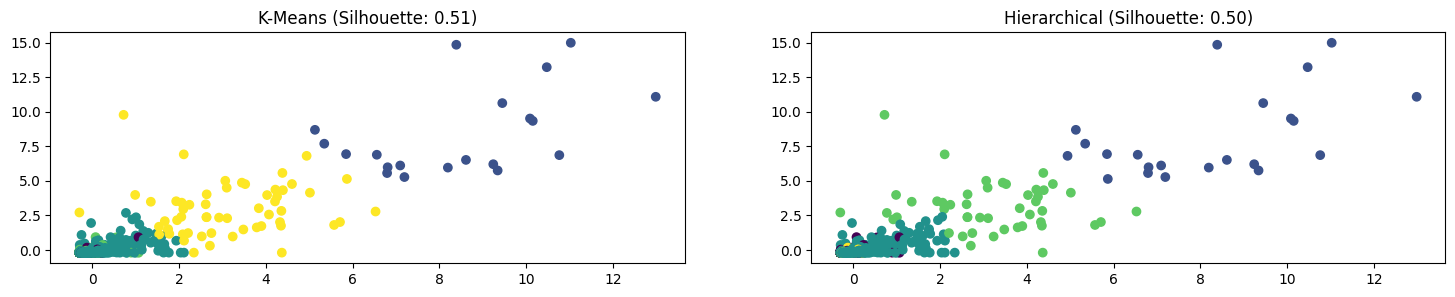

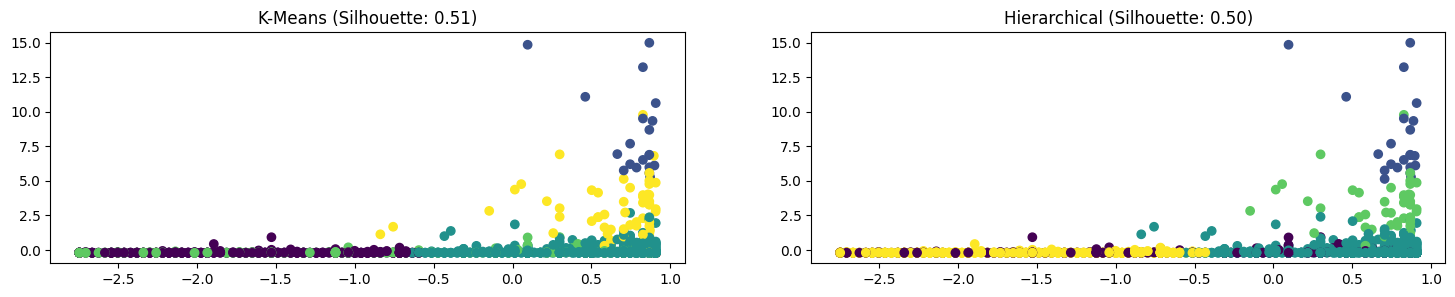

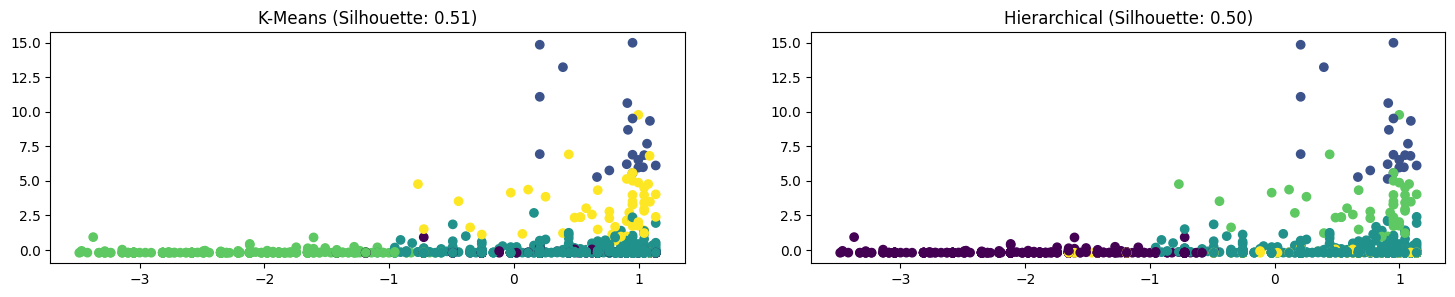

In [ ]:
#################################################################  Visualizar los clusters

fig, axs = plt.subplots(1, 2, figsize=(18, 3))

# K-Means
axs[0].scatter(X_scaled[:, 0], X_scaled[:, 4], c=kmeans_labels, cmap='viridis')
axs[0].set_title(f'K-Means (Silhouette: {kmeans_silhouette:.2f})')

# Hierarchical Clustering
axs[1].scatter(X_scaled[:, 0], X_scaled[:, 4], c=hierarchical_labels, cmap='viridis')
axs[1].set_title(f'Hierarchical (Silhouette: {hierarchical_silhouette:.2f})')


fig, axs = plt.subplots(1, 2, figsize=(18, 3))

# K-Means
axs[0].scatter(X_scaled[:, 1], X_scaled[:, 4], c=kmeans_labels, cmap='viridis')
axs[0].set_title(f'K-Means (Silhouette: {kmeans_silhouette:.2f})')

# Hierarchical Clustering
axs[1].scatter(X_scaled[:, 1], X_scaled[:, 4], c=hierarchical_labels, cmap='viridis')
axs[1].set_title(f'Hierarchical (Silhouette: {hierarchical_silhouette:.2f})')


fig, axs = plt.subplots(1, 2, figsize=(18, 3))

# K-Means
axs[0].scatter(X_scaled[:, 3], X_scaled[:, 4], c=kmeans_labels, cmap='viridis')
axs[0].set_title(f'K-Means (Silhouette: {kmeans_silhouette:.2f})')

# Hierarchical Clustering
axs[1].scatter(X_scaled[:, 3], X_scaled[:, 4], c=hierarchical_labels, cmap='viridis')
axs[1].set_title(f'Hierarchical (Silhouette: {hierarchical_silhouette:.2f})')

fig, axs = plt.subplots(1, 2, figsize=(18, 3))

# K-Means
axs[0].scatter(X_scaled[:, 2], X_scaled[:, 4], c=kmeans_labels, cmap='viridis')
axs[0].set_title(f'K-Means (Silhouette: {kmeans_silhouette:.2f})')

# Hierarchical Clustering
axs[1].scatter(X_scaled[:,2], X_scaled[:, 4], c=hierarchical_labels, cmap='viridis')
axs[1].set_title(f'Hierarchical (Silhouette: {hierarchical_silhouette:.2f})')

plt.show()

### **5.3 Clasificación con Hierarchical**

In [ ]:
################################################################# Aplicar Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict(X_scaled)
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)
print(f'Hierarchical Clustering Silhouette Score: {hierarchical_silhouette:.2f}')

hier_labels = hierarchical.fit_predict(X_scaled)        # Asignar etiquetas a los clusters
df_clasif["cluster_hier"]=hier_labels
df_clasif.head(5)

Hierarchical Clustering Silhouette Score: 0.50


,totl_tom,conx_tot,Pob_dren,Pobl_aPot,total_in,cluster_hier
0,"329,552.000","324,115.000",98.000,99.000,"889,622,823.430",1
1,"14,473.000","13,738.000",80.000,70.000,"914,517.000",2
2,"16,871.000","19,288.000",98.000,99.000,"42,545,534.000",2
3,"4,333.000","4,333.000",98.000,98.000,"7,223,000.000",2
4,"35,095.000","34,851.000",96.000,98.000,"110,530,539.220",2


In [ ]:
df_clasif["folio"]=df_Analisys1["folio"]
df_clasif["total_in"]=df_Analisys1["total_in"]
df_clasif["cve_ent"]=df_Analisys1["cve_ent"]
df_clasif["Name_Ent"]=df_Analisys1["Name_Ent"]
df_clasif["Name_Mun"]=df_Analisys1["Name_Mun"]
print(df_clasif.shape)
df_clasif.head(5)

(2394, 10)


,totl_tom,conx_tot,Pob_dren,Pobl_aPot,total_in,cluster_hier,folio,cve_ent,Name_Ent,Name_Mun
0,"329,552.000","324,115.000",98.000,99.000,"889,622,823.430",1,1001,1,Aguascalientes,Aguascalientes
1,"14,473.000","13,738.000",80.000,70.000,"914,517.000",2,1002,1,Aguascalientes,Asientos
2,"16,871.000","19,288.000",98.000,99.000,"42,545,534.000",2,1003,1,Aguascalientes,Calvillo
3,"4,333.000","4,333.000",98.000,98.000,"7,223,000.000",2,1004,1,Aguascalientes,Cosío
4,"35,095.000","34,851.000",96.000,98.000,"110,530,539.220",2,1005,1,Aguascalientes,Jesús María


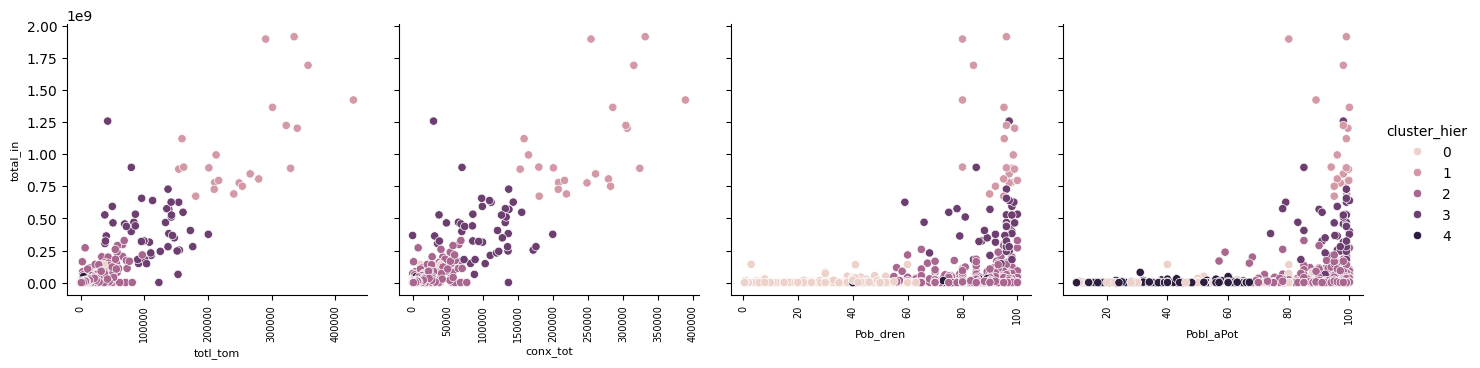

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")
import seaborn as sns

Col_Var_x1 =['totl_tom', 'conx_tot', 'Pob_dren', 'Pobl_aPot'] #'ext_sani_km', 'ext_co_km',
Col_Var_y =['total_in']

g = sns.pairplot(df_clasif, x_vars=Col_Var_x1, y_vars=Col_Var_y, height=3.5,hue='cluster_hier')

# Ajustar el tamaño de la letra de los ejes
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)  # Cambia 8 al tamaño de fuente deseado
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Cambia 8 al tamaño de fuente deseado
    ax.tick_params(axis='x', labelrotation=90,labelsize=7)


In [ ]:
df_clasif["cluster_hier"]
df_clasif["cluster_hier"].value_counts()

,count
cluster_hier,
2,1513
0,458
4,354
3,47
1,22


### **5.4 Clasificación conKMeans**

In [ ]:
################################################################# Aplicar K-Means
kmeans = KMeans(n_clusters=5, random_state=42,n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f'K-Means Silhouette Score: {kmeans_silhouette:.2f}')

df_clasif["cluster_Kmean"]=kmeans_labels
df_clasif.head(2)


K-Means Silhouette Score: 0.51


,totl_tom,conx_tot,Pob_dren,Pobl_aPot,total_in,cluster_hier,folio,cve_ent,Name_Ent,Name_Mun,cluster_Kmean
0,"329,552.000","324,115.000",98.000,99.000,"889,622,823.430",1,1001,1,Aguascalientes,Aguascalientes,1
1,"14,473.000","13,738.000",80.000,70.000,"914,517.000",2,1002,1,Aguascalientes,Asientos,2


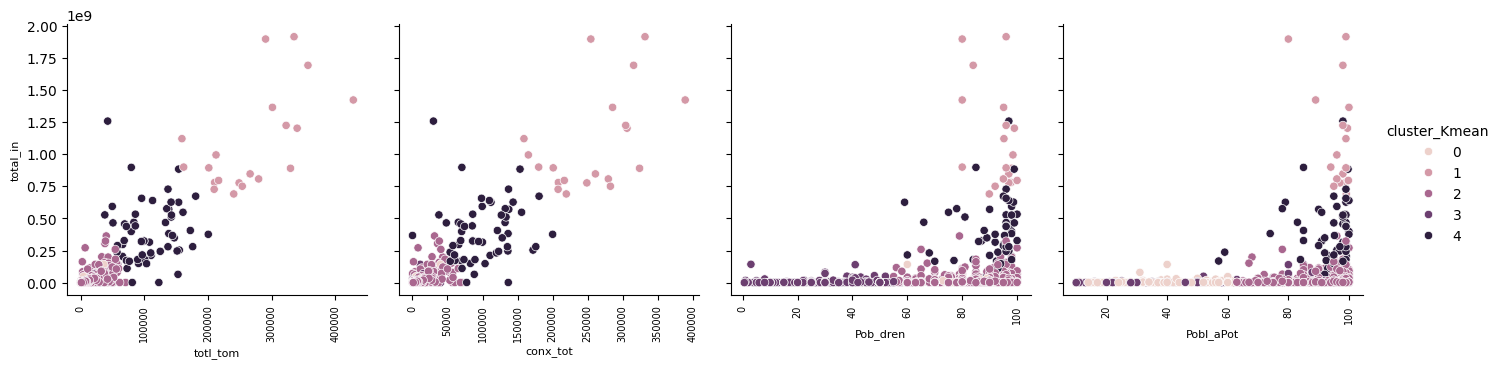

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")
import seaborn as sns

Col_Var_x1 =['totl_tom', 'conx_tot', 'Pob_dren', 'Pobl_aPot']  #'ext_sani_km', 'ext_co_km',
Col_Var_y =['total_in']

g = sns.pairplot(df_clasif, x_vars=Col_Var_x1, y_vars=Col_Var_y, height=3.5,hue='cluster_Kmean')

# Ajustar el tamaño de la letra de los ejes
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)  # Cambia 8 al tamaño de fuente deseado
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Cambia 8 al tamaño de fuente deseado
    ax.tick_params(axis='x', labelrotation=90,labelsize=7)


In [ ]:
df_clasif["cluster_Kmean"]
df_clasif["cluster_Kmean"].value_counts()

,count
cluster_Kmean,
2,1571
3,399
0,347
4,57
1,20


In [ ]:
#0 Pequeños
df_clasif["cluster_Kmean"] = df_clasif["cluster_Kmean"].replace({1:"Clase 5",
                                                                 4:"Clase 4",
                                                                 2:"Clase 3",
                                                                 3:"Clase 2",
                                                                 0:"Clase 1"})

df_clasif["cluster_Kmean"].value_counts()

#0 Pequeños
"""                                                             {1:"Clase 5. Muy alta cobertura de agua pot. y alcantarillado ",
                                                                 4:"Clase 4. Alta cobertura de agua pot. y alcantarillado ",
                                                                 2:"Clase 3. Media cobertura de agua pot. y alcantarillado ",
                                                                 3:"Clase 2. Baja cobertura de agua pot. y alcantarillado ",
                                                                 0:"Clase 1. Muy baja cobertura de agua pot. y alcantarillado ",})
"""

'                                                             {1:"Clase 5. Muy alta cobertura de agua pot. y alcantarillado ",\n                                                                 4:"Clase 4. Alta cobertura de agua pot. y alcantarillado ",\n                                                                 2:"Clase 3. Media cobertura de agua pot. y alcantarillado ",\n                                                                 3:"Clase 2. Baja cobertura de agua pot. y alcantarillado ",\n                                                                 0:"Clase 1. Muy baja cobertura de agua pot. y alcantarillado ",})\n'

In [ ]:
df_clasif["cluster_Kmean"]
df_clasif["cluster_Kmean"].value_counts()

,count
cluster_Kmean,
Clase 3,1571
Clase 2,399
Clase 1,347
Clase 4,57
Clase 5,20


### **5.5 Caracterización de los Clusters**

En esta sección, se muestran los resultados de la agrupación con cinco clústeres de los OAPAS con  el método KMeans. La siguiente figura muestra la gráfica con la segmentación de los OAPAS, de color rojo se muestra la clase 5, de color verde la clase 4, de color azul la clase 3 y de color morado y amarillo las clases 2 y 1 respectivamente.

La figura muestra el ingreso en el eje y con respecto a las otras cuatro variables analizadas en el eje x.

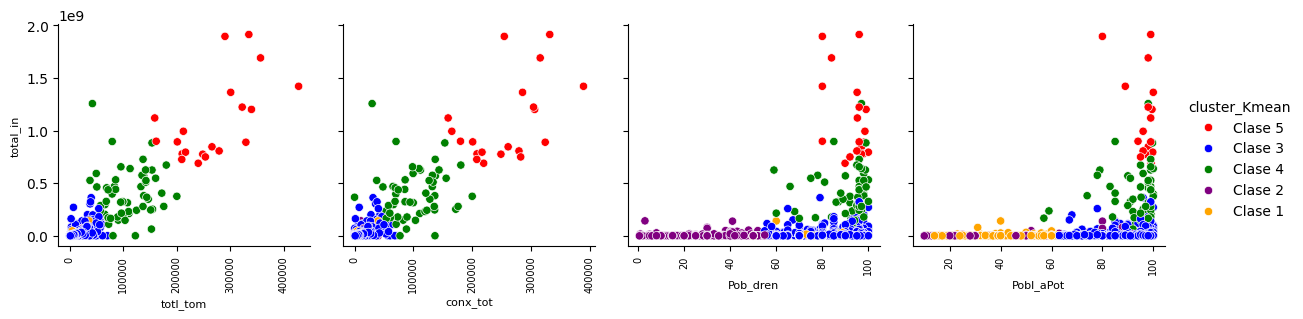

In [ ]:
# @title
colors = ['red', 'blue', 'green', 'purple', 'orange']

Col_Var_x1 = ['totl_tom', 'conx_tot', 'Pob_dren', 'Pobl_aPot']
Col_Var_y = ['total_in']

# Crear el pairplot con una paleta de colores personalizada
g = sns.pairplot(
    df_clasif,
    x_vars=Col_Var_x1,
    y_vars=Col_Var_y,
    height=3,
    hue='cluster_Kmean',
    palette=colors
)

for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)
    ax.tick_params(axis='x', labelrotation=90, labelsize=7)

plt.show()


Los resultados del agrupamiento de los OAPAS se muestran en la siguiente figura mediante diagramas de caja para cada una de las variables analizadas. En los diagramas de caga mostrados se muestran simultáneamente información sobre la forma y dispersión de las características en los cinco grupos. La figura muestra en cada caja rellena de color azul al 50% de los OAPAS para cada variable analizada, y con una línea horizontal de color negro que se muestra dentro de cada se muestra al valor de la mediana. El extremo inferior de la caja muestra el primer cuartil mientras que el extremo superior representa el tercer cuartil.

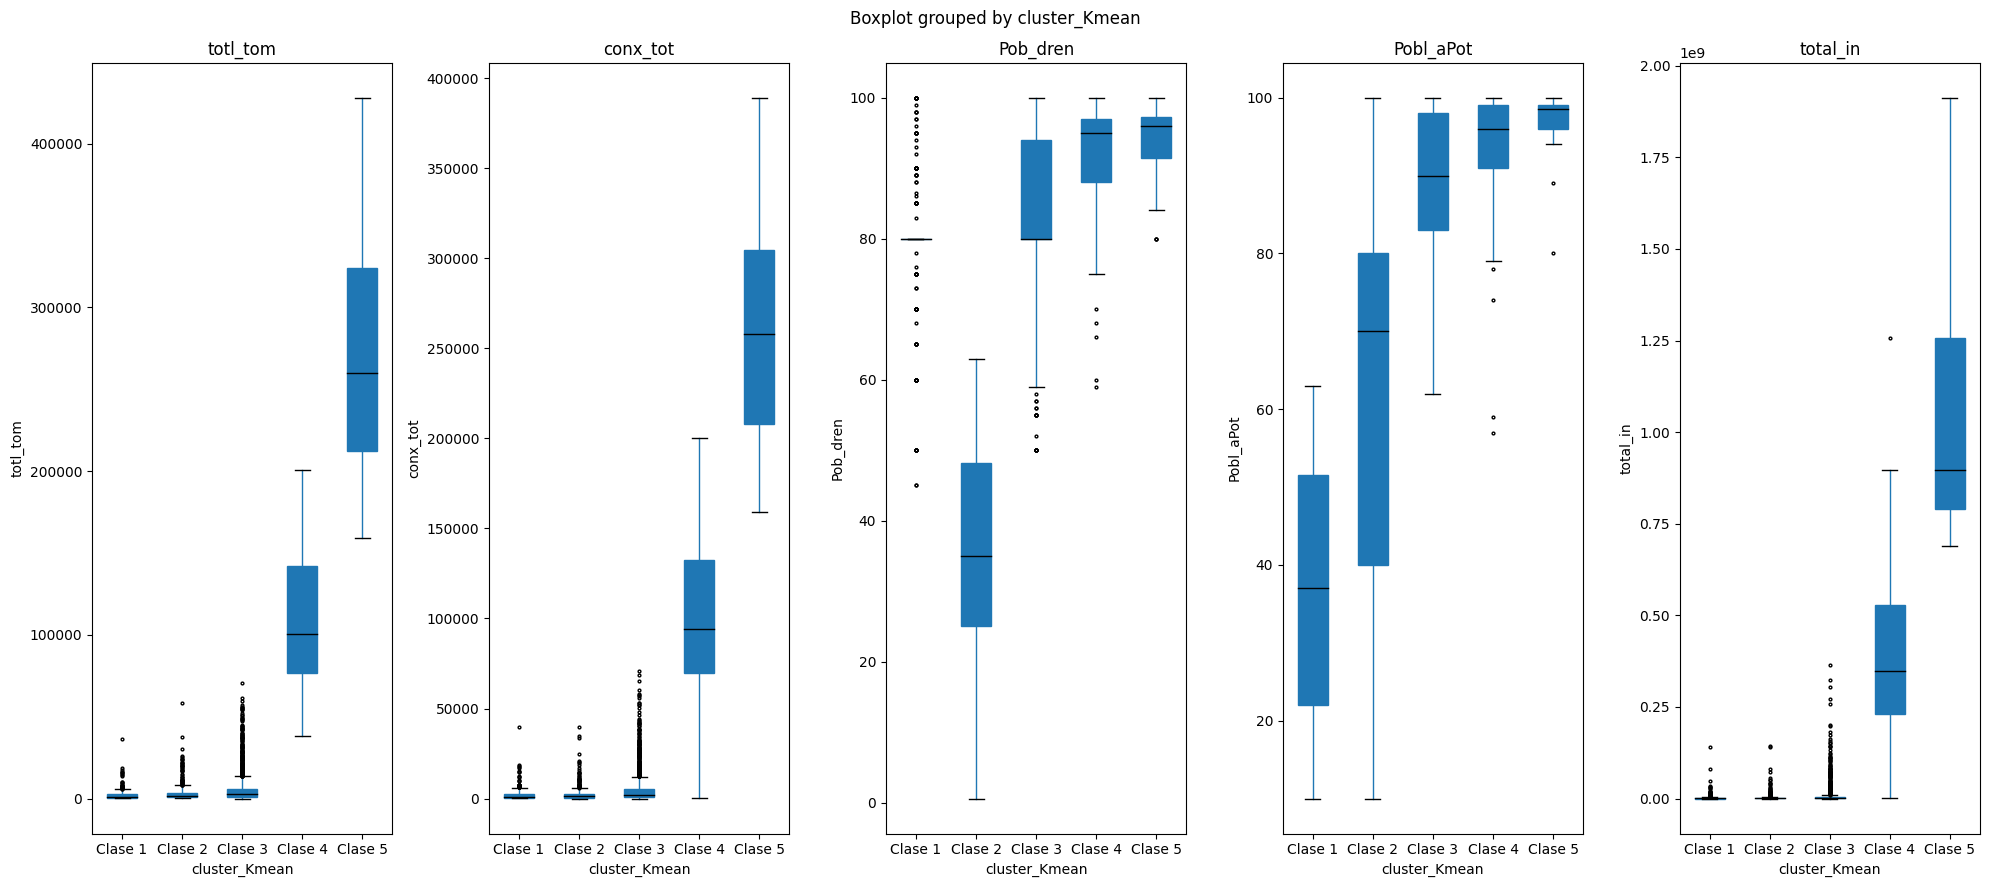

In [ ]:
# @title
import matplotlib.pyplot as plt

# Crear una figura y ejes para los gráficos
fig, axes = plt.subplots(1, 5, figsize=(20, 9), sharey=False)

# Iterar sobre las variables y crear los boxplots para cada una
variables = ['totl_tom', 'conx_tot', 'Pob_dren', 'Pobl_aPot', 'total_in']
for i, var in enumerate(variables):
    # Crear el boxplot para la variable var en el i-ésimo eje
    box = df_clasif.boxplot(
        column=var,
        by='cluster_Kmean',
        ax=axes[i],
        patch_artist=True,
        flierprops=dict(marker='o', color='gray', markersize=2)  # Personalización de los puntos (bolitas)
    )

    # Configuraciones adicionales
    for patch in box.artists:
        patch.set_facecolor('blue')

    # Cambiar el color de la línea de la mediana a negro
    for line in box.lines[4::6]:  # Las líneas de mediana están en estas posiciones
        line.set_color('black')

    axes[i].set_title(var)  # Título del gráfico
    axes[i].set_xlabel('cluster_Kmean')  # Etiqueta del eje x
    axes[i].set_ylabel(var)  # Etiqueta del eje y (variable)
    axes[i].grid(False)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


**Promedios de las variables por cada cluster**

In [ ]:
cols=['cluster_Kmean','totl_tom', 'conx_tot', 'Pob_dren', 'Pobl_aPot', 'total_in']
pd.options.display.float_format = '{:,.0f}'.format
df_clasif[cols].groupby('cluster_Kmean').mean()

,totl_tom,conx_tot,Pob_dren,Pobl_aPot,total_in
cluster_Kmean,,,,,
Clase 1,"2,125","2,178",80,36,"2,654,816"
Clase 2,"3,654","2,656",35,62,"4,052,319"
Clase 3,"5,910","5,419",84,90,"8,955,772"
Clase 4,"108,525","99,790",91,93,"391,604,826"
Clase 5,"268,229","257,066",93,97,"1,083,648,155"


In [ ]:
df_clasif[cols].groupby('cluster_Kmean').describe().T

cluster_Kmean       Clase 1     Clase 2     Clase 3       Clase 4  \
totl_tom  count         347         399       1,571            57   
          mean        2,125       3,654       5,910       108,525   
          std         3,492       5,906       9,225        39,279   
          min            30          79           4        38,063   
          25%           344         690         910        76,602   
          50%           850       1,762       2,516       100,736   
          75%         2,475       3,679       6,099       142,048   
          max        36,269      58,183      70,645       200,470   
conx_tot  count         347         399       1,571            57   
          mean        2,178       2,656       5,419        99,790   
          std         3,683       4,618       8,836        40,786   
          min            39          11           4            74   
          25%           322         400         798        69,862   
          50%           800       1,177       2,213        94,363   
          75%         2,477       2,686       5,362       132,397   
          max        39,983      40,000      70,645       200,040   
Pob_dren  count         347         399       1,571            57   
          mean           80          35          84            91   
          std            10          15          10            10   
          min            45           1          50            59   
          25%            80          25          80            88   
          50%            80          35          80            95   
          75%            80          48          94            97   
          max           100          63         100           100   
Pobl_aPot count         347         399       1,571            57   
          mean           36          62          90            93   
          std            16          27           9             9   
          min            10          10          62            57   
          25%            22          40          83            91   
          50%            37          70          90            96   
          75%            52          80          98            99   
          max            63         100         100           100   
total_in  count         347         399       1,571            57   
          mean    2,654,816   4,052,319   8,955,772   391,604,826   
          std     9,987,261  13,136,541  26,852,362   232,751,735   
          min           321       3,390       1,000     1,271,509   
          25%        93,400     315,455     481,000   231,225,911   
          50%     1,271,509   1,271,509   1,271,509   348,488,764   
          75%     1,271,509   1,584,606   4,587,819   527,094,536   
          max   141,761,159 142,660,111 363,176,393 1,256,686,180   

cluster_Kmean         Clase 5  
totl_tom  count            20  
          mean        268,229  
          std          69,984  
          min         159,115  
          25%         212,090  
          50%         259,988  
          75%         324,366  
          max         428,144  
conx_tot  count            20  
          mean        257,066  
          std          61,817  
          min         159,115  
          25%         208,119  
          50%         257,824  
          75%         304,790  
          max         389,221  
Pob_dren  count            20  
          mean             93  
          std               7  
          min              80  
          25%              91  
          50%              96  
          75%              97  
          max             100  
Pobl_aPot count            20  
          mean             97  
          std               5  
          min              80  
          25%              96  
          50%              98  
          75%              99  
          max             100  
total_in  count            20  
          mean  1,083,648,155  
          std     387,682,697  
          min     

La siguiente tabla  muestra un resumen de las principales características correspondientes a las cinco clasificaciones de los OAPAS. Del análisis de los resultados  se puede distinguir que los OAPAS que se encuentran en las clases 4 y 5 tienen los valores con más altos de ingresos, en promedio   de 391,604,8256 pesos para la clase 4 y de  1,083,648,155 pesos para la clase 5. Este tipo de comportamiento también se asocia con las variables de población servida de agua potable y drenaje con los promedios más altos de cobertura, así como para la cantidad de tomas de agua potable y conexiones de drenaje.  

Las características de las clases 1,2 y 3 muestran que los ingresos son los más bajos con promedios de 2,654,816 pesos, $4,052,319 pesos y 8,955,772 pesos, respectivamente. En cuanto a la cantidad de tomas de agua potable y conexiones de drenaje, también se observa un comportamiento similar ya que estas clases tienen los valores más bajos, con valores promedio de 2,125 tomas y 2,177 conexiones para la clase 1; 3,653 tomas y 2,656 conexiones para la clase 2 y 5,910 tomas y 5,419 conexiones para la clase 3.  

Es importante mencionar que en los resultados  no se muestra ninguna información de las Ciudad de México que es considerada uno de los núcleos de población más importantes de México, debido a que en el Censo de INEGI no se encuentra información. Una descripción más detallada de las clases se muestra en el anexo de este documento.

# **6. Modelo de regresión para estimar el Ingreso OAPAS**
---

En este apartado se muestran los resultados del modelo matemático calculado utilizando la biblioteca de sklearn para estimar el ingreso de los OAPAS en función de la cantidad de tomas y conexiones de agua potable, así como el porcentaje de población servida de agua potable y drenaje.  El proceso para calcular el modelo utilizando el método de regresión lineal múltiple consiste en la estandarización de las variables de estudio utilizando StandarScaler de la librería de sklearn.

(2394, 11)


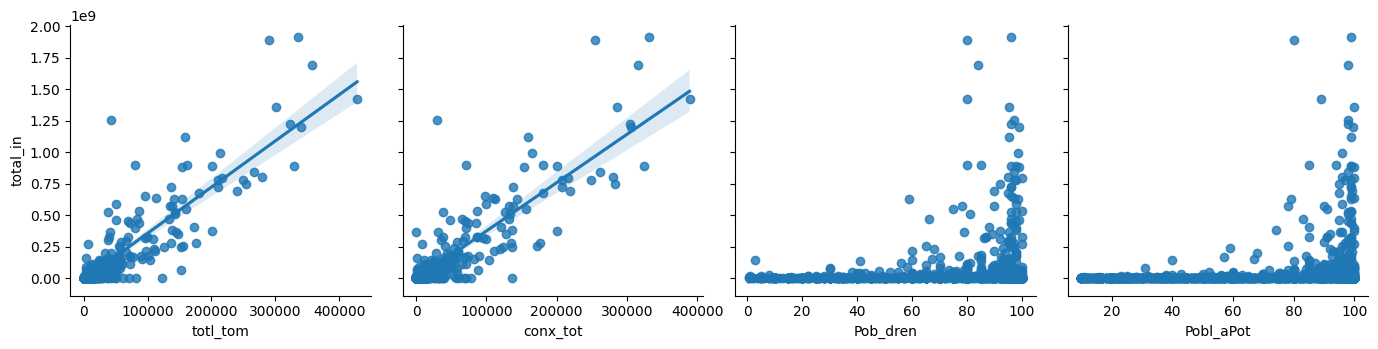

In [ ]:
print(df_clasif.shape)
Col_Var_x1 =['totl_tom', 'conx_tot', 'Pob_dren', 'Pobl_aPot']  #'ext_sani_km', 'ext_co_km',
Col_Var_y =['total_in']
sns.pairplot(df_clasif,x_vars=Col_Var_x1 , y_vars=Col_Var_y ,height=3.5, aspect=1, kind='reg')
plt.show()

### **6.1 Exploración de datos: Matriz de correlación**

In [ ]:
df_clasif_reg = df_clasif.iloc[:, [0,1,2,3,4]].copy() #5,6
my_corr1 = df_clasif_reg.corr()                           ##Calcula matriz de correlación de variables numéricas del df
my_corr1                                                  ## Muestra la matriz de correlación

,totl_tom,conx_tot,Pob_dren,Pobl_aPot,total_in
totl_tom,1,1,0,0,1
conx_tot,1,1,0,0,1
Pob_dren,0,0,1,0,0
Pobl_aPot,0,0,0,1,0
total_in,1,1,0,0,1


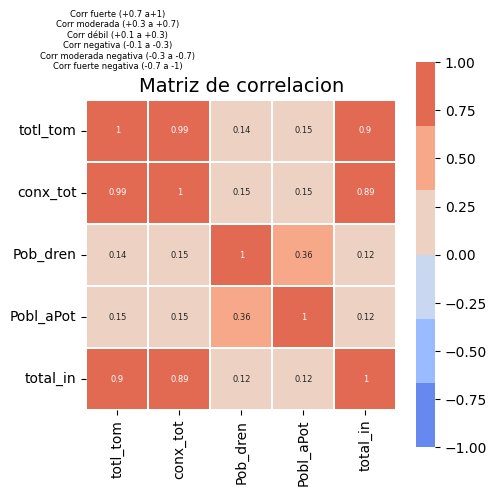

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(my_corr1, annot=True, square=True,
            cmap=sns.color_palette("coolwarm"),
            vmax=1,      #np.max(np.sort(my_corr.values)[:,-2]),
            vmin=-1,
           linewidths=0.3,
            annot_kws={"size": 6})
plt.title("Matriz de correlacion", fontsize=14)
plt.text(0.5,-0.5,"Corr fuerte (+0.7 a+1)\nCorr moderada (+0.3 a +0.7)\nCorr débil (+0.1 a +0.3)\nCorr negativa (-0.1 a -0.3)\nCorr moderada negativa (-0.3 a -0.7)\nCorr fuerte negativa (-0.7 a -1)",
         fontsize=6,  # Tamaño de la fuente del texto adicional
         ha='center')

plt.show()

### **6.2 Definición feautures y separación de datos (test,train)**

In [ ]:
###4.1 Definición de Variable dependinte y e independientes (features)
from sklearn.model_selection import train_test_split

df_clasif_reg1_X =df_clasif_reg.copy()

y = df_clasif_reg['total_in'].values                           ## Variable de salida y= Ingreso total en pesos
df_clasif_reg1_X.drop(columns=["total_in"],inplace=True)        ## Variable independientes xs= features
X_1 = df_clasif_reg1_X.values                                   ## Definir la matriz de features

## 4.2 Separación de datos Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X_1,y, train_size=0.80, random_state=4595)

print(f"Entrenamiento: {X_train.shape,y_train.shape}")
print(f"Prueba: {X_test.shape,y_test.shape}")

Entrenamiento: ((1915, 4), (1915,))
Prueba: ((479, 4), (479,))


### **6.3 Transformación de datos y entrenamiento**

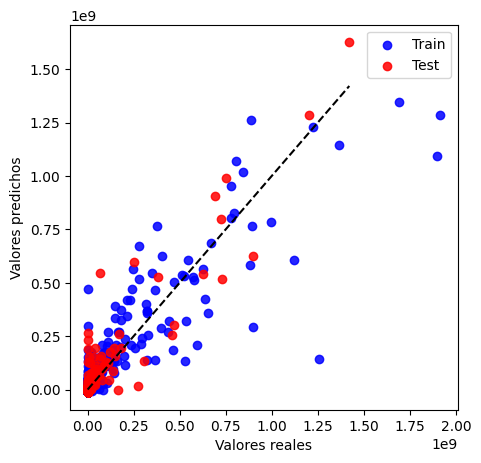

In [ ]:
## Transformar los datos en entrenamiento (train) y prueba (test) con MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
MMscaler =  MinMaxScaler()
X_train_MMS = MMscaler.fit_transform(X_train)
X_test_MMS  = MMscaler.transform(X_test)

## 4.4 Entrenar el modelo con datos de entrenamiento X_train y y_train
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_MMS, y_train)

## Calcular predicciones usando las variables predictoras del conjunto de prueba
y_pred_test = lr.predict(X_test_MMS)

## Representar gráficamente esta comparación
y_pred_train = lr.predict(X_train_MMS)

xaxis = np.linspace(np.min(y_test),np.max(y_test),100)
plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(y_train, y_pred_train, c='blue',alpha=0.85,label='Train')
plt.scatter(y_test, y_pred_test, c='red',alpha=0.85,label='Test')
plt.plot(xaxis,xaxis,'k--')  # La línea de referencia y_pred=y_real
plt.legend(loc='best')
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.show()

La figura muestra la gráfica de los resultados de la estimación del modelo contra los valores reales. Se puede observar que, aunque existen diferencias los valores estimados (puntos de color rojo) siguen un comportamiento similar a los valores reales (puntos de color azul).


### **6.4 Validación y ecuación**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

columns=['totl_tom', 'conx_tot', 'Pob_dren', 'Pobl_aPot']  #'ext_sani_km', 'ext_co_km',

print("________________Modelo Cluster 0,1,2.  Modelo dos variables Normalizado con MinMaxScaler_______________\n")
print("*** La ecuación con coef normalizados (MinMaxScaler) para estimar el Ingreso es : \n")

#-------------------------------------------------------------------------------------------------------------
coef_scaled=lr.coef_
intercept_scaled = lr.intercept_
expression = "Ingreso= "
for coef, column in zip(coef_scaled, columns):
    expression += f"{coef:,.3f} {column} + "
expression = expression[:-2]   # Eliminar el último "+ " sobrante y luego imprimir
print(f" {expression} + {intercept_scaled}")

#-------------------------------------------------------------------------------------------------------------
X_min = MMscaler.data_min_
X_max = MMscaler.data_max_
X_range = X_max - X_min
coef_original = coef_scaled / X_range    # Revertir los coeficientes
intercept_original = intercept_scaled - np.sum(coef_scaled * (X_min / X_range))  # Revertir el intercepto
print("** La ecuación  para estimar Ingreso es : \n")
expression = "Ingreso= "
for coef, column in zip(coef_original, columns):
    expression += f"{coef:,.3f} {column} + "
expression = expression[:-2]   # Eliminar el último "+ " sobrante y luego imprimir
print(f" {expression} + {intercept_original} ")
print("_____________________________________________________________________________")

#-------------------------------------------------------------------------------------------------------------
y_pred_test = lr.predict(X_test_MMS)
y_pred_train = lr.predict(X_train_MMS)

print(f"R2 en la prueba: {lr.score(X_test_MMS,y_test)}")
print(f"MAE en el conjunto de prueba: {mean_absolute_error(y_test,y_pred_test)}")  # Esta es muy interpretativa
print(f"MSE en el conjunto de prueba: {mean_squared_error(y_test,y_pred_test)}")
print("   ")
#print(f"R2 en el entrenamiento: {lr_ElasticNet.score(X_train_MMS,y_train)}")
#print(f"MAE en el conjunto de entrenamiento: {mean_absolute_error(y_train,y_pred_train)}")  # Esta es muy interpretativa
#print(f"MSE en el conjunto de entrenamiento: {mean_squared_error(y_train,y_pred_train)}")

df_clasif=df_clasif.copy()
#df_clasif_1["Est_total_in_Mod1"]=(coef_original[0])*df_clasif_1["tom_mun"] + (coef_original[1])*df_clasif_1["tom_loc"]+intercept_original

ColX = df_clasif[['totl_tom', 'conx_tot', 'Pob_dren', 'Pobl_aPot']]        ###Codigo para ejecutar el modelo #'ext_sani_km', 'ext_co_km',
ColNormX=MMscaler.transform(ColX)
Est_Mod_Python=lr.predict(ColNormX)                    ###Codigo para ejecutar el modelo
df_clasif["Est_Mod_Pythonlr"]=Est_Mod_Python

df_clasif["Error"]=(df_clasif["Est_Mod_Pythonlr"]-df_clasif["total_in"])
df_clasif["ErrorCuad"]=(df_clasif["Est_Mod_Pythonlr"]-df_clasif["total_in"])**2

MSE=(df_clasif["ErrorCuad"].mean())
RMSE=(df_clasif["ErrorCuad"].mean())**.5
ME=(df_clasif["Error"].mean())

print(f"El error  medio es    : {ME:,.4f} pesos")
print(f"El error cuad medio es: {MSE:,.4f} pesos")
print(f"El raiz del error cuad medio es: {RMSE:,.4f} pesos")
df_clasif.head(3)


________________Modelo Cluster 0,1,2.  Modelo dos variables Normalizado con MinMaxScaler_______________

*** La ecuación con coef normalizados (MinMaxScaler) para estimar el Ingreso es : 

 Ingreso= 1,179,163,502.054 totl_tom + 190,394,319.864 conx_tot + 85,457.608 Pob_dren + -8,261,607.967 Pobl_aPot  + -4572255.278850913
** La ecuación  para estimar Ingreso es : 

 Ingreso= 3,303.349 totl_tom + 573.717 conx_tot + 859.734 Pob_dren + -91,795.644 Pobl_aPot  + -3670322.943538056 
_____________________________________________________________________________
R2 en la prueba: 0.838883484771118
MAE en el conjunto de prueba: 19742076.90767916
MSE en el conjunto de prueba: 2520434325859517.0
   
El error  medio es    : 801,189.2575 pesos
El error cuad medio es: 3,047,790,881,226,623.5000 pesos
El raiz del error cuad medio es: 55,206,801.0414 pesos


,totl_tom,conx_tot,Pob_dren,Pobl_aPot,total_in,cluster_hier,folio,cve_ent,Name_Ent,Name_Mun,cluster_Kmean,Est_Mod_Pythonlr,Error,ErrorCuad
0,"329,552","324,115",98,99,"889,622,823",1,1001,1,Aguascalientes,Aguascalientes,Clase 5,"1,261,901,779","372,278,956","138,591,620,825,909,376"
1,"14,473","13,738",80,70,"914,517",2,1002,1,Aguascalientes,Asientos,Clase 3,"45,663,858","44,749,341","2,002,503,486,811,035"
2,"16,871","19,288",98,99,"42,545,534",2,1003,1,Aguascalientes,Calvillo,Clase 3,"54,122,820","11,577,286","134,033,553,214,706"


La ecuación para estimar el Ingreso de los OAPAS y que se calculó entrenado al modelo con las variables estandarizadas es:


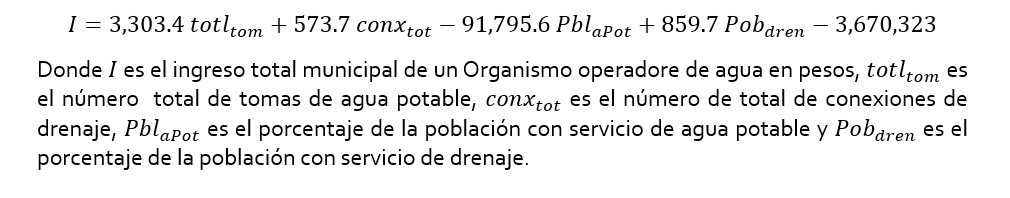



La siguiente figura muestra la gráfica de dispersión de los valores estimados con el modelo ajustado con respecto a los valores reales para las cuatro variables independientes. Los puntos de color azul en la gráfica son los valores estimados con el modelo de regresión lineal calculado y los puntos de color gris son los valores reales del Censo. Realizando una comparación visual de figura 11, entre los datos reales y los estimados se puede observar que el modelo realiza estimaciones parecidas a los datos reales.


Text(0, 0.5, 'total_in')

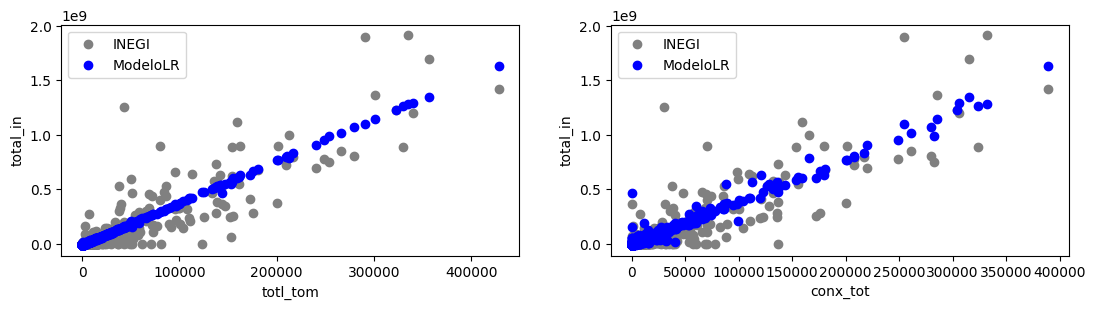

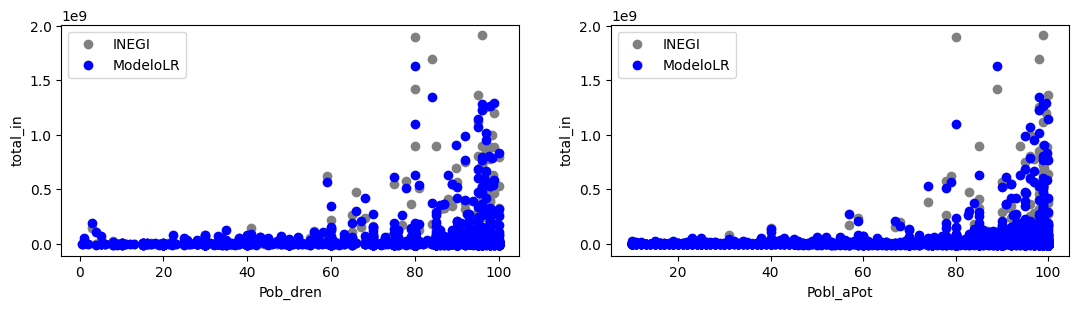

In [ ]:
# @title

fig, axs = plt.subplots(1, 2, figsize=(13, 3))

axs[0].scatter(df_clasif["totl_tom"],df_clasif["total_in"], color='gray', label='INEGI')
axs[0].scatter(df_clasif["totl_tom"],df_clasif["Est_Mod_Pythonlr"], color='blue', label='ModeloLR')

axs[0].legend()
axs[0].set_xlabel("totl_tom")
axs[0].set_ylabel("total_in")

axs[1].scatter(df_clasif["conx_tot"],df_clasif["total_in"], color='gray', label='INEGI')
axs[1].scatter(df_clasif["conx_tot"],df_clasif["Est_Mod_Pythonlr"], color='blue', label='ModeloLR')

axs[1].legend()
axs[1].set_xlabel("conx_tot")
axs[1].set_ylabel("total_in")

fig, axs = plt.subplots(1, 2, figsize=(13, 3))
axs[0].scatter(df_clasif["Pob_dren"],df_clasif["total_in"], color='gray', label='INEGI')
axs[0].scatter(df_clasif["Pob_dren"],df_clasif["Est_Mod_Pythonlr"], color='blue', label='ModeloLR')
axs[0].legend()
axs[0].set_xlabel("Pob_dren")
axs[0].set_ylabel("total_in")


axs[1].scatter(df_clasif["Pobl_aPot"],df_clasif["total_in"], color='gray', label='INEGI')
axs[1].scatter(df_clasif["Pobl_aPot"],df_clasif["Est_Mod_Pythonlr"], color='blue', label='ModeloLR')
axs[1].legend()
axs[1].set_xlabel("Pobl_aPot")
axs[1].set_ylabel("total_in")


In [ ]:
df_clasif.head()

,totl_tom,conx_tot,Pob_dren,Pobl_aPot,total_in,cluster_hier,folio,cve_ent,Name_Ent,Name_Mun,cluster_Kmean,Est_Mod_Pythonlr,Error,ErrorCuad
0,"329,552","324,115",98,99,"889,622,823",1,1001,1,Aguascalientes,Aguascalientes,Clase 5,"1,261,901,779","372,278,956","138,591,620,825,909,376"
1,"14,473","13,738",80,70,"914,517",2,1002,1,Aguascalientes,Asientos,Clase 3,"45,663,858","44,749,341","2,002,503,486,811,035"
2,"16,871","19,288",98,99,"42,545,534",2,1003,1,Aguascalientes,Calvillo,Clase 3,"54,122,820","11,577,286","134,033,553,214,706"
3,"4,333","4,333",98,98,"7,223,000",2,1004,1,Aguascalientes,Cosío,Clase 3,"4,217,286","-3,005,714","9,034,318,385,234"
4,"35,095","34,851",96,98,"110,530,539",2,1005,1,Aguascalientes,Jesús María,Clase 3,"123,341,889","12,811,350","164,130,692,530,920"


In [ ]:
df_unido_left = pd.merge(df, df_clasif, on='folio', how='left')
df_unido_left.to_excel('df_unido_left.xlsx', index=False, engine='openpyxl')

In [ ]:
df_unido_right = pd.merge(df, df_clasif, on='folio', how='right')
df_unido_right.to_excel('df_unido_right.xlsx', index=False, engine='openpyxl')

En el conjunto de prueba se calcularon las siguientes métricas para evaluar el desempeño del modelo.    

*  Error absoluto medio (MAE) = 19,742,077 pesos
*  Error cuadrático medio (MSE)= 2,520,434,325,859,517
*  Raíz del error cuadrático medio (RMSE) = 50,203,927 pesos

Los resultados del MAE y el RMSE indican que el modelo tiene un error mínimo para estimar el ingreso en los Clase 5, en donde los ingresos tienen un rango de 689,929,731 a 1,913,074,129 pesos. Sin embargo, es recomendable revisar sus estimaciones con mayor detalle para verificar su correcta implementación.


# **7. Conclusiones**
---

Los resultados de la segmentación de los OAPAS realizada con el método de aprendizaje no supervisado KMeans sugieren que la segmentación con cinco clases permite determinar con éxito algunas de las principales características de estos prestadores de servicios en México. Sin embargo, existen factores importantes como datos con errores presentes en el Censo de INEGI que dificultaron el obtener una segmentación con mayor precisión. Por otro lado, en este trabajo sólo se consideraron para la segmentación el número de tomas de agua potable, el número de conexiones de drenaje, el porcentaje de la población servida con agua potable y alcantarillado, así como el ingreso de los OAPAS, factores que aunque son importantes, se recomienda realizar otros análisis considerando factores como la cantidad de empleados del organismo operador, el número de habitantes, los ingresos de los diferentes rubros, entre otras variables que están presentes en el censo de INEGI.  


Otra conclusión importante en este trabajo es que se logró determinar un modelo matemático para estimar el ingreso de los OAPAS en México en función del número de tomas de agua potable, el número de conexiones de drenaje, así como del porcentaje de la población servida con agua potable y alcantarillado con un coeficiente de determinación R2 de 0.84 calculada en los datos de prueba, lo que indica que el modelo presenta un buen ajuste. Sin embargo, debido a la gran dispersión presente en las observaciones, el modelo podría se útil para estimar el ingreso sólo en los OAPAS de los Clase 5, en los que los ingresos tienen un rango de 689,929,731 a 1,913,074,129 pesos.  


Es recomendable revisar las observaciones atípicas detectadas en el Censo de INEGI para mejorar los resultados tanto de la segmentación de los OAPAS, así como el modelo para estimar su ingreso. También se recomienda realizar un dendograma para evaluar los niveles de similitud de las segmentaciones.
